# **Project - Road Damages Detection with Yolov8**

Dataset Road Damages Detection versi 7, disediakan oleh Tam, E., dirancang untuk mendeteksi berbagai jenis kerusakan jalan seperti retakan, lubang, atau deformasi lainnya. Dataset ini tersedia di Roboflow Universe dan memiliki anotasi yang sesuai untuk tugas deteksi objek. Dataset ini mendukung pengembangan sistem berbasis deep learning yang dapat digunakan untuk mendukung pemeliharaan jalan secara otomatis.

Dalam eksperimen ini, YOLOv8 digunakan sebagai framework deteksi objek karena performanya yang tinggi dalam mendeteksi objek dengan cepat dan akurat, meskipun menggunakan dataset yang kompleks seperti kerusakan jalan.


---

**Road Damages Detection v7**

*  **Jumlah kelas (7):** Beberapa kategori kerusakan seperti D00 (Crack), D10 (Pothole),  D20 (Manhole), D40 (Other Deformations).
*  **Jumlah gambar:** 3506 dengan anotasi bounding box untuk setiap kategori kerusakan.
*  **Format dataset:** YOLO format, dengan file data.yaml yang mendefinisikan struktur dataset.
*  **Sumber:** https://universe.roboflow.com/eric-tam-oz6si/road-damages-detection/dataset/7
*  **Pre-processing:** Dataset ini telah melalui tahap pre-processing, di mana objek kerusakan jalan diisolasi dari gambar latar belakang.

---

**Pre-processing:** Isolated Objects

Pre-processing dataset ini bertujuan untuk meningkatkan kualitas pelatihan dengan:

*  **Pemotongan Objek:** Setiap kerusakan jalan diisolasi menggunakan bounding box sehingga latar belakang yang tidak relevan dihilangkan.
*  **Normalisasi:** Resolusi gambar diseragamkan, misalnya 640x640 piksel, untuk memastikan kompatibilitas dengan YOLOv8.


---

Dengan menggunakan YOLOv8 dan dataset yang telah melalui pre-processing isolated objects, model mampu mendeteksi kerusakan jalan secara efektif. Pre-processing meningkatkan kualitas pelatihan dengan meminimalkan pengaruh noise dari latar belakang. Dataset ini sangat cocok untuk mengembangkan sistem inspeksi jalan otomatis yang dapat meningkatkan efisiensi pemeliharaan infrastruktur.

In [1]:
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
from PIL import Image

# Tentukan base path dan path hasil model
base_path = r"C:\Users\fatur\Documents\Source Code Project VK__IF-45-DSIS.03_Kelompok 7_Road Damages Object Detection"
data_yaml_path = os.path.join(base_path, "Dataset", "data.yaml")
save_dir = os.path.join(base_path, "YOLOv8", "Hasil Model")  # Lokasi penyimpanan hasil pelatihan

# Pastikan direktori hasil model ada
os.makedirs(save_dir, exist_ok=True)

# Inisialisasi model YOLOv8
model = YOLO("yolov8n.pt")  # Gunakan YOLOv8 Nano sebagai basis

100%|█████████████████████████████████████████████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 9.93MB/s]


    yolov8n.pt: Model YOLOv8 Nano yang telah di-pretrained pada dataset COCO.
    Nano: Versi yang ringan dan cepat dari YOLOv8, cocok untuk perangkat dengan sumber daya terbatas.

Dataset diatur menggunakan file data.yaml, yang mendefinisikan jumlah kelas, nama kelas, dan lokasi folder data (train, valid). File ini menjadi input utama untuk melatih YOLOv8. Penggunaan YOLOv8 Nano memastikan efisiensi tanpa mengorbankan akurasi secara signifikan.

Model YOLOv8 Nano diinisialisasi dengan bobot pre-trained pada dataset COCO. Bobot ini memberikan keuntungan sebagai titik awal pelatihan, mempercepat proses konvergensi model dan meningkatkan akurasi.


---

**Efisiensi YOLOv8 Nano**

*  **Kelebihan:** YOLOv8 Nano dirancang untuk efisiensi komputasi, ideal untuk perangkat keras dengan memori rendah.
*  **Kekurangan:** Akurasi mungkin sedikit lebih rendah dibandingkan model yang lebih besar seperti YOLOv8 Medium atau Large.

In [3]:
# Melatih model menggunakan dataset custom
model.train(data=data_yaml_path, epochs=50, imgsz=640, save_dir=save_dir)

print(f"Model dan hasil pelatihan disimpan di: {save_dir}")

Ultralytics 8.3.55  Python-3.10.0 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\Users\fatur\Documents\Source Code Project VK__IF-45-DSIS.03_Kelompok 7_Road Damages Object Detection\Dataset\data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, s

train: Scanning C:\Users\fatur\Documents\Source Code Project VK__IF-45-DSIS.03_Kelompok 7_Road Damages Object Detection
val: Scanning C:\Users\fatur\Documents\Source Code Project VK__IF-45-DSIS.03_Kelompok 7_Road Damages Object Detection\D

Plotting labels to C:\Users\fatur\runs\detect\train2\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to C:\Users\fatur\runs\detect\train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G     0.3141      2.296       1.07         47        640: 100%|██████████| 151/151 [08:53<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [01:05

                   all        689        689      0.525       0.68      0.602      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      0.266      1.548      1.011         41        640: 100%|██████████| 151/151 [08:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [01:00

                   all        689        689      0.614      0.607      0.633      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G     0.2618      1.337          1         48        640: 100%|██████████| 151/151 [08:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:59

                   all        689        689      0.607      0.713      0.704      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G     0.2481      1.253     0.9942         45        640: 100%|██████████| 151/151 [08:45<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.587      0.739      0.706      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G     0.2345      1.148     0.9874         45        640: 100%|██████████| 151/151 [08:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.683      0.687      0.741      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      0.229       1.09     0.9845         45        640: 100%|██████████| 151/151 [08:43<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689       0.66      0.675      0.735      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G     0.2174      1.037     0.9773         43        640: 100%|██████████| 151/151 [08:45<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.766      0.707      0.785        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G     0.2116     0.9899     0.9729         46        640: 100%|██████████| 151/151 [08:43<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.631      0.687      0.716      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.2041     0.9555     0.9703         48        640: 100%|██████████| 151/151 [08:43<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.529      0.654      0.647      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      0.207     0.9239     0.9691         48        640: 100%|██████████| 151/151 [08:47<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.764      0.765      0.843      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G     0.1943     0.8998     0.9665         46        640: 100%|██████████| 151/151 [08:47<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.774      0.765      0.859      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.1893     0.8717     0.9599         42        640: 100%|██████████| 151/151 [08:45<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.791       0.72      0.835      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G     0.1862      0.873     0.9597         38        640: 100%|██████████| 151/151 [08:46<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.689      0.752       0.79      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G     0.1915     0.8409     0.9626         48        640: 100%|██████████| 151/151 [08:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.716      0.746      0.794      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.1866     0.8305     0.9642         50        640: 100%|██████████| 151/151 [08:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.706      0.815      0.838      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.1833     0.8227     0.9588         45        640: 100%|██████████| 151/151 [08:48<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.756      0.799      0.858      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.1848     0.7991     0.9671         44        640: 100%|██████████| 151/151 [08:45<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.717      0.771      0.807      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      0.175     0.7931     0.9603         43        640: 100%|██████████| 151/151 [08:46<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.776      0.799      0.852      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.1772     0.7652     0.9628         34        640: 100%|██████████| 151/151 [08:46<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.778      0.831       0.87      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.1751     0.7616     0.9606         42        640: 100%|██████████| 151/151 [08:45<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.751      0.798      0.838        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.1708     0.7613     0.9576         45        640: 100%|██████████| 151/151 [08:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689       0.73      0.705      0.812      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.1706     0.7409     0.9529         40        640: 100%|██████████| 151/151 [08:48<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.771      0.767      0.871      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.1673     0.7337     0.9539         51        640: 100%|██████████| 151/151 [08:46<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.815      0.805      0.879      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.1732     0.7081     0.9586         42        640: 100%|██████████| 151/151 [08:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.832      0.788      0.891      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.1663     0.7125     0.9578         45        640: 100%|██████████| 151/151 [08:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689       0.78      0.808      0.867      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.1651     0.6961     0.9532         40        640: 100%|██████████| 151/151 [08:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.793      0.807      0.882       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      0.167     0.6706     0.9493         34        640: 100%|██████████| 151/151 [08:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.827       0.82      0.901      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.1694     0.6618      0.952         48        640: 100%|██████████| 151/151 [08:45<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.823      0.845      0.899      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.1607     0.6555     0.9487         41        640: 100%|██████████| 151/151 [08:45<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [01:00

                   all        689        689      0.802       0.85      0.894      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.1574     0.6391     0.9485         51        640: 100%|██████████| 151/151 [08:53<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.809      0.864      0.906      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.1542     0.6377     0.9493         40        640: 100%|██████████| 151/151 [08:43<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.836      0.834      0.905      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.1587     0.6518     0.9506         42        640: 100%|██████████| 151/151 [08:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.791      0.867      0.904      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.1557     0.6246     0.9435         49        640: 100%|██████████| 151/151 [08:45<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.853      0.818      0.909      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.1539     0.6274     0.9437         50        640: 100%|██████████| 151/151 [08:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689       0.82      0.866      0.909       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.1549     0.5916      0.952         38        640: 100%|██████████| 151/151 [08:55<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:59

                   all        689        689      0.848      0.823      0.907      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.1523     0.5986     0.9487         46        640: 100%|██████████| 151/151 [08:46<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.831      0.819      0.907      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.1489     0.5916     0.9419         45        640: 100%|██████████| 151/151 [08:56<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.834      0.765      0.895      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.1495      0.585     0.9445         47        640: 100%|██████████| 151/151 [08:47<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.855      0.834      0.907      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      0.149     0.5632     0.9456         42        640: 100%|██████████| 151/151 [08:55<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:57

                   all        689        689      0.873      0.812      0.915       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.1459     0.5548     0.9464         45        640: 100%|██████████| 151/151 [08:53<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:59

                   all        689        689      0.863      0.827      0.911      0.885


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.1166     0.5013     0.9884         15        640: 100%|██████████| 151/151 [08:40<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.842       0.85      0.909      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G    0.09533     0.4182     0.9558         15        640: 100%|██████████| 151/151 [08:46<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.848      0.876      0.919       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G    0.09116     0.3768     0.9568         15        640: 100%|██████████| 151/151 [08:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:59

                   all        689        689      0.881      0.857      0.926      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G    0.09026     0.3582     0.9516         15        640: 100%|██████████| 151/151 [08:41<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.847      0.865      0.913      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G    0.08777     0.3545     0.9524         15        640: 100%|██████████| 151/151 [08:46<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.879      0.826      0.918      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G    0.09015     0.3311     0.9545         15        640: 100%|██████████| 151/151 [08:48<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.868       0.85      0.925      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G    0.08661     0.3077     0.9511         15        640: 100%|██████████| 151/151 [08:48<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:59

                   all        689        689       0.86      0.858      0.921      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G    0.08476     0.3095     0.9529         15        640: 100%|██████████| 151/151 [08:41<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.904      0.824      0.926      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G    0.08389     0.2815     0.9412         15        640: 100%|██████████| 151/151 [08:47<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58

                   all        689        689      0.845      0.886      0.926      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G    0.08166     0.2755     0.9517         15        640: 100%|██████████| 151/151 [08:47<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:57

                   all        689        689      0.876      0.853      0.927      0.908



50 epochs completed in 8.149 hours.
Optimizer stripped from C:\Users\fatur\runs\detect\train2\weights\last.pt, 6.3MB
Optimizer stripped from C:\Users\fatur\runs\detect\train2\weights\best.pt, 6.3MB

Validating C:\Users\fatur\runs\detect\train2\weights\best.pt...
Ultralytics 8.3.55  Python-3.10.0 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
Model summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:49


                   all        689        689      0.844      0.887      0.926      0.911
                   D00        149        149      0.837      0.793      0.883      0.858
                   D10        102        102      0.873      0.947      0.974      0.964
                   D20        143        143      0.826      0.853      0.907      0.906
                   D40         45         45      0.586        0.8      0.788      0.762
                   D43         22         22      0.973          1      0.995      0.995
                   D44        112        112      0.851      0.911      0.961      0.961
                   D50        116        116       0.96      0.905      0.976      0.927
Speed: 1.4ms preprocess, 61.9ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to C:\Users\fatur\runs\detect\train2
Model dan hasil pelatihan disimpan di: C:\Users\fatur\Documents\Source Code Project VK__IF-45-DSIS.03_Kelompok 7_Road Damages Object Detection\YOLOv8\Hasi

    data: Mengacu pada file data.yaml yang mendefinisikan dataset.
    epochs=50: Jumlah iterasi pelatihan.
    imgsz=640: Ukuran gambar input yang diubah menjadi resolusi 640x640.
    save_dir: Lokasi hasil pelatihan, termasuk model terbaik (best.pt).



---

*   **Struktur Model YOLOv8 Nano:** Memiliki 225 lapisan, 3,012,213 parameter, dan 8.2 GFLOPs, menunjukkan efisiensi model.
*   **Optimizer:** Menggunakan AdamW dengan learning rate optimal yang dipilih secara otomatis.
*   **Logging:** Hasil pelatihan, termasuk grafik metrik (loss, mAP), disimpan di direktori hasil.

**Model YOLOv8 menggunakan beberapa blok utama:**

    Conv: Lapisan konvolusi untuk mengekstraksi fitur dari gambar.
    C2f: Blok Cross-Stage Partial Networks (CSP) yang memperbaiki efisiensi memori.
    SPPF: Pooling spasial piramida untuk menangkap informasi dalam skala yang berbeda.
    Detect: Kepala deteksi untuk menghasilkan bounding box, confidence score, dan kelas.

    batch=16:
    Batch size adalah 16, menunjukkan jumlah gambar yang diproses dalam satu iterasi pelatihan. Nilai ini dipilih untuk mengoptimalkan penggunaan memori tanpa mengorbankan kinerja.

    optimizer=auto:
    Optimizer secara otomatis dipilih oleh YOLOv8. Dalam kasus ini, AdamW digunakan dengan pengaturan parameter:
    lr0=0.000909: Learning rate awal.
    momentum=0.9: Parameter momentum untuk mempercepat konvergensi gradien.

    patience=100:
    Model akan berhenti jika tidak ada peningkatan signifikan dalam 100 iterasi terakhir (early stopping).

    warmup_epochs=3.0:
    Model memulai pelatihan dengan nilai learning rate kecil selama 3 epoch pertama untuk mencegah osilasi di awal pelatihan.

    weight_decay=0.0005:
    Regulasi untuk mencegah overfitting dengan membatasi bobot model agar tetap kecil.

    iou=0.7:
    Ambang batas Intersection over Union untuk memutuskan apakah suatu prediksi dianggap valid.

    conf=None:
    Confidence threshold default digunakan untuk menentukan apakah bounding box harus ditampilkan.

    max_det=300:
    Maksimal 300 bounding box dapat dideteksi dalam satu gambar.

**Metrik Evaluasi**

*   **Precision (P):** Proporsi prediksi benar dari total prediksi positif.
*   **Recall (R):** Proporsi prediksi benar dari total instance sebenarnya.
*   **mAP50:** Rata-rata presisi pada threshold IoU 50%.
*   **mAP50-95:** Rata-rata presisi pada berbagai threshold IoU (50%-95%).

**Hasil**

*   **Precision:** 0.844 (84.4%)
*   **Recall:** 0.887 (88.7%)
*   **mAP50:** 0.926 (92.6%)
*   **mAP50-95:** 0.911 (91.1%)

**Analisis Kelas:**

*   Kelas D43 memiliki performa terbaik dengan mAP50-95 mencapai 99.5%.
*   Kelas D40 memiliki performa paling rendah, terutama pada presisi.

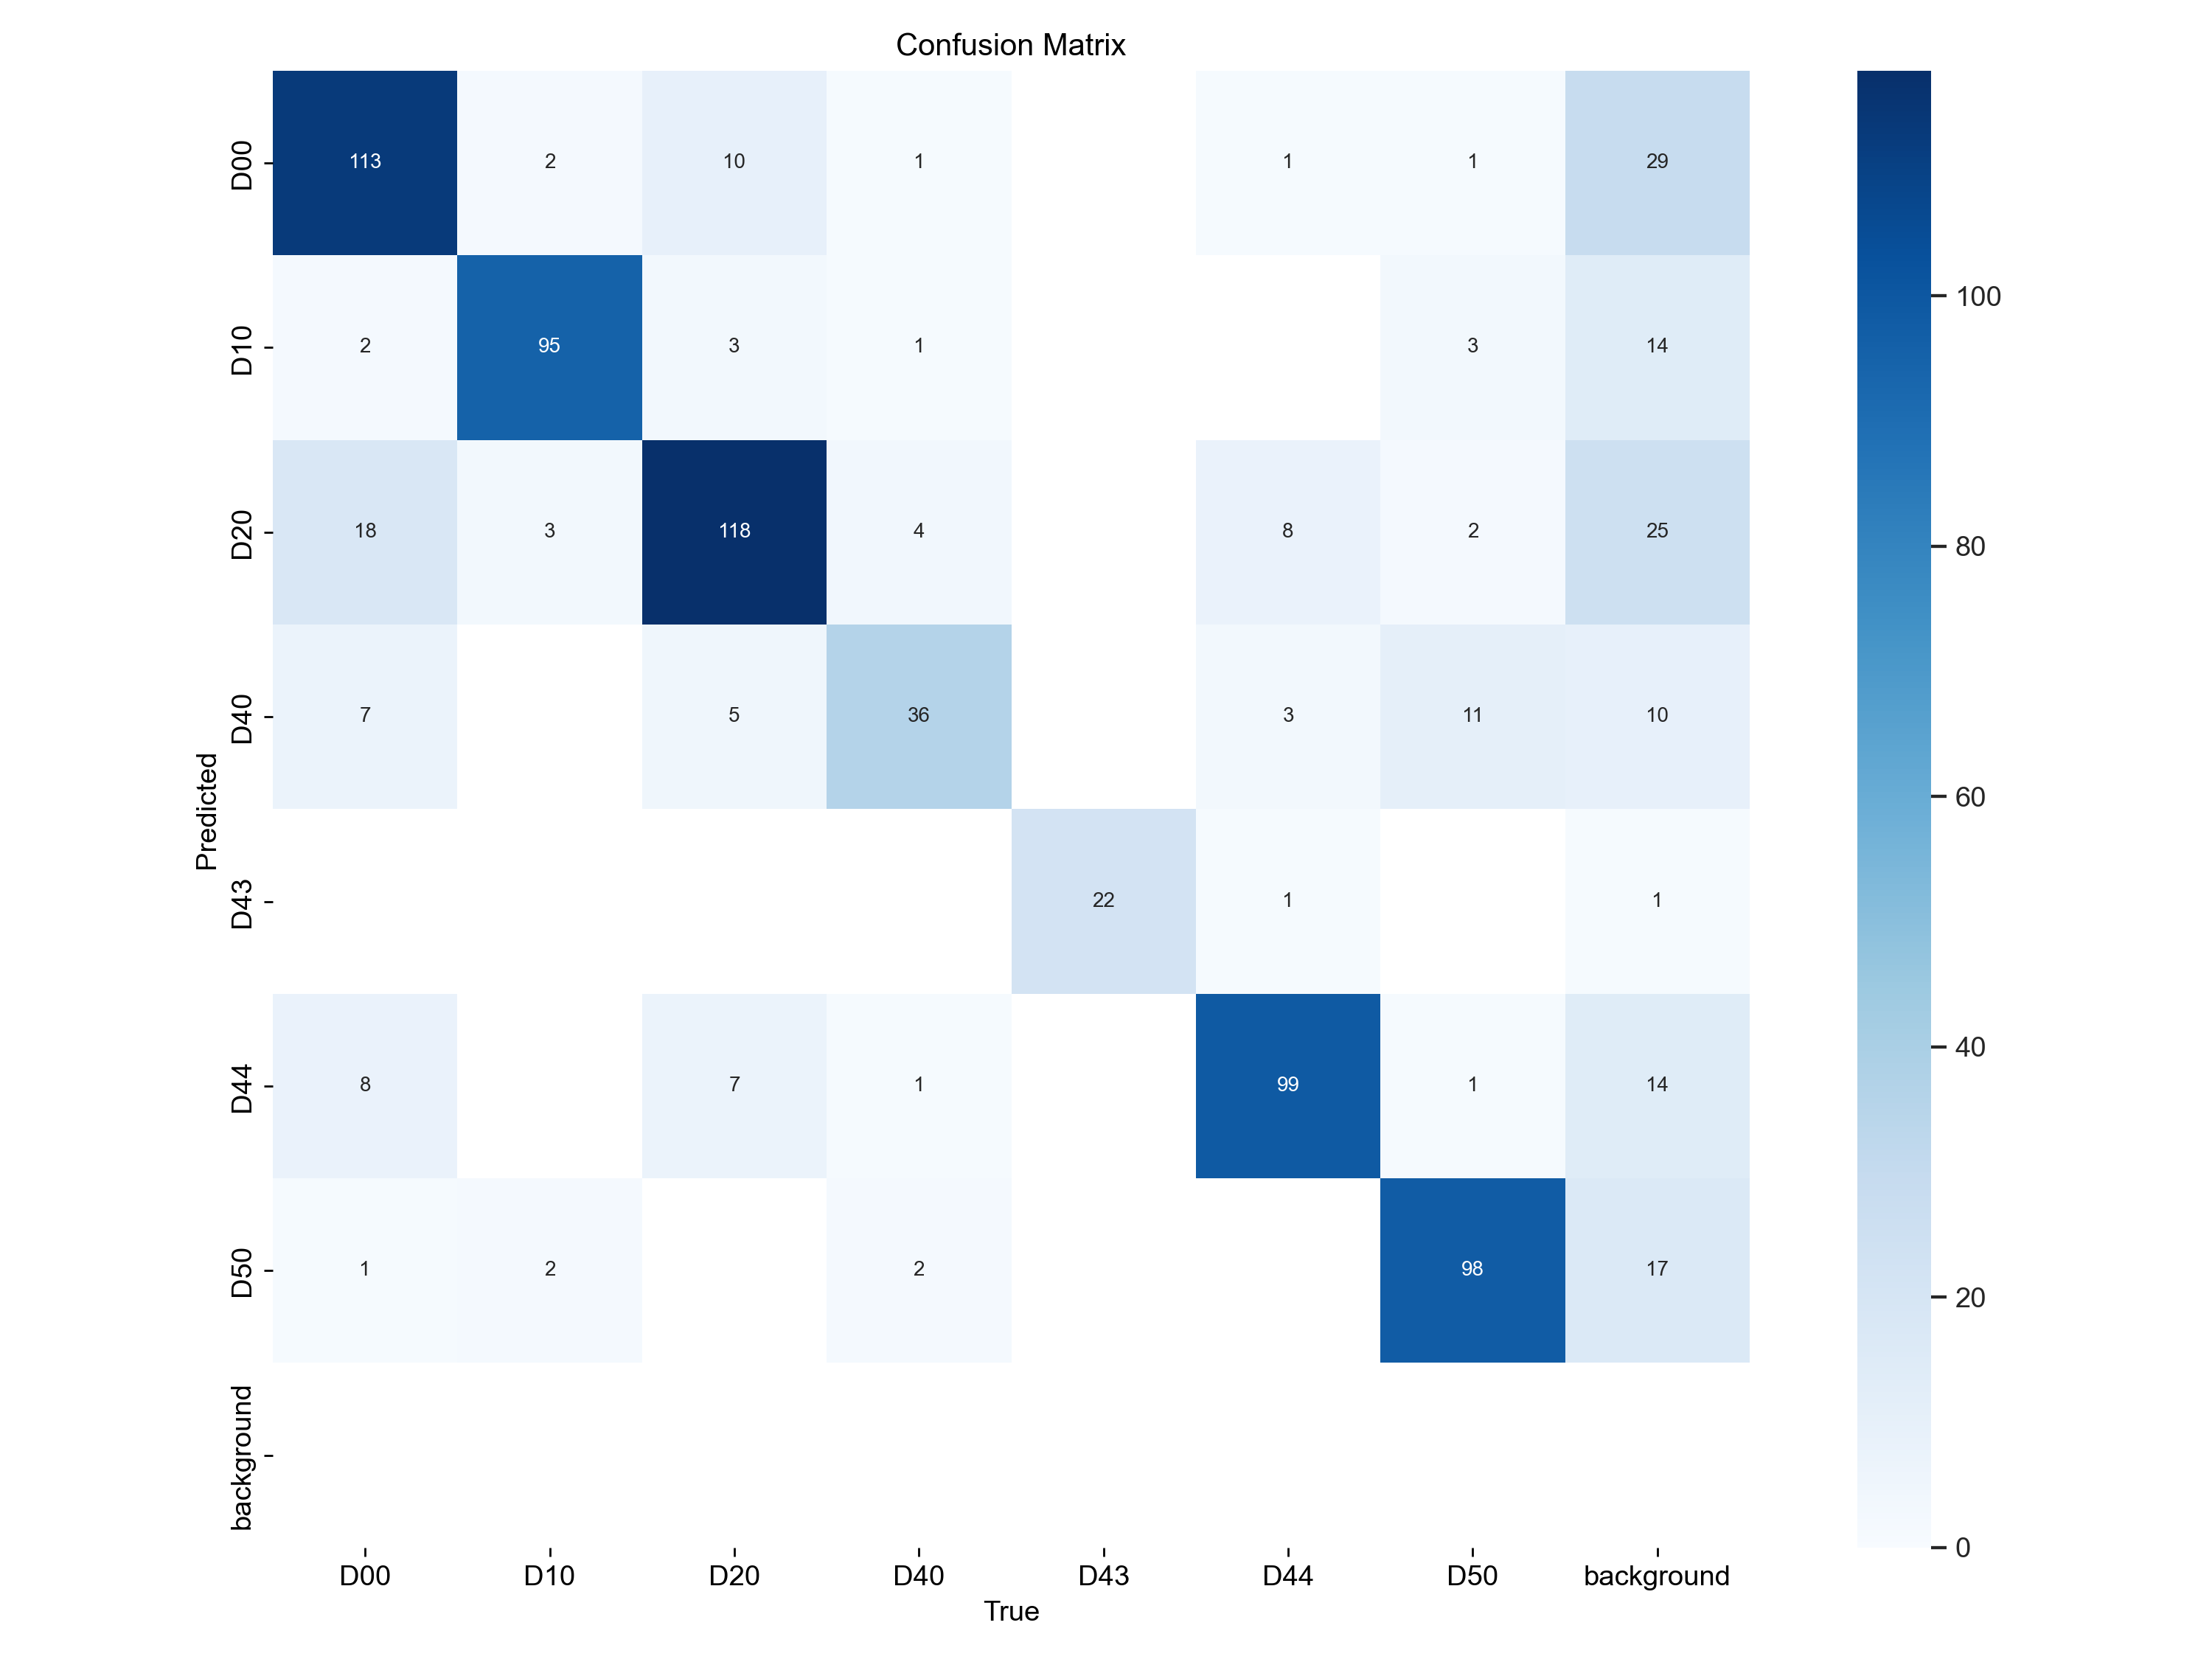

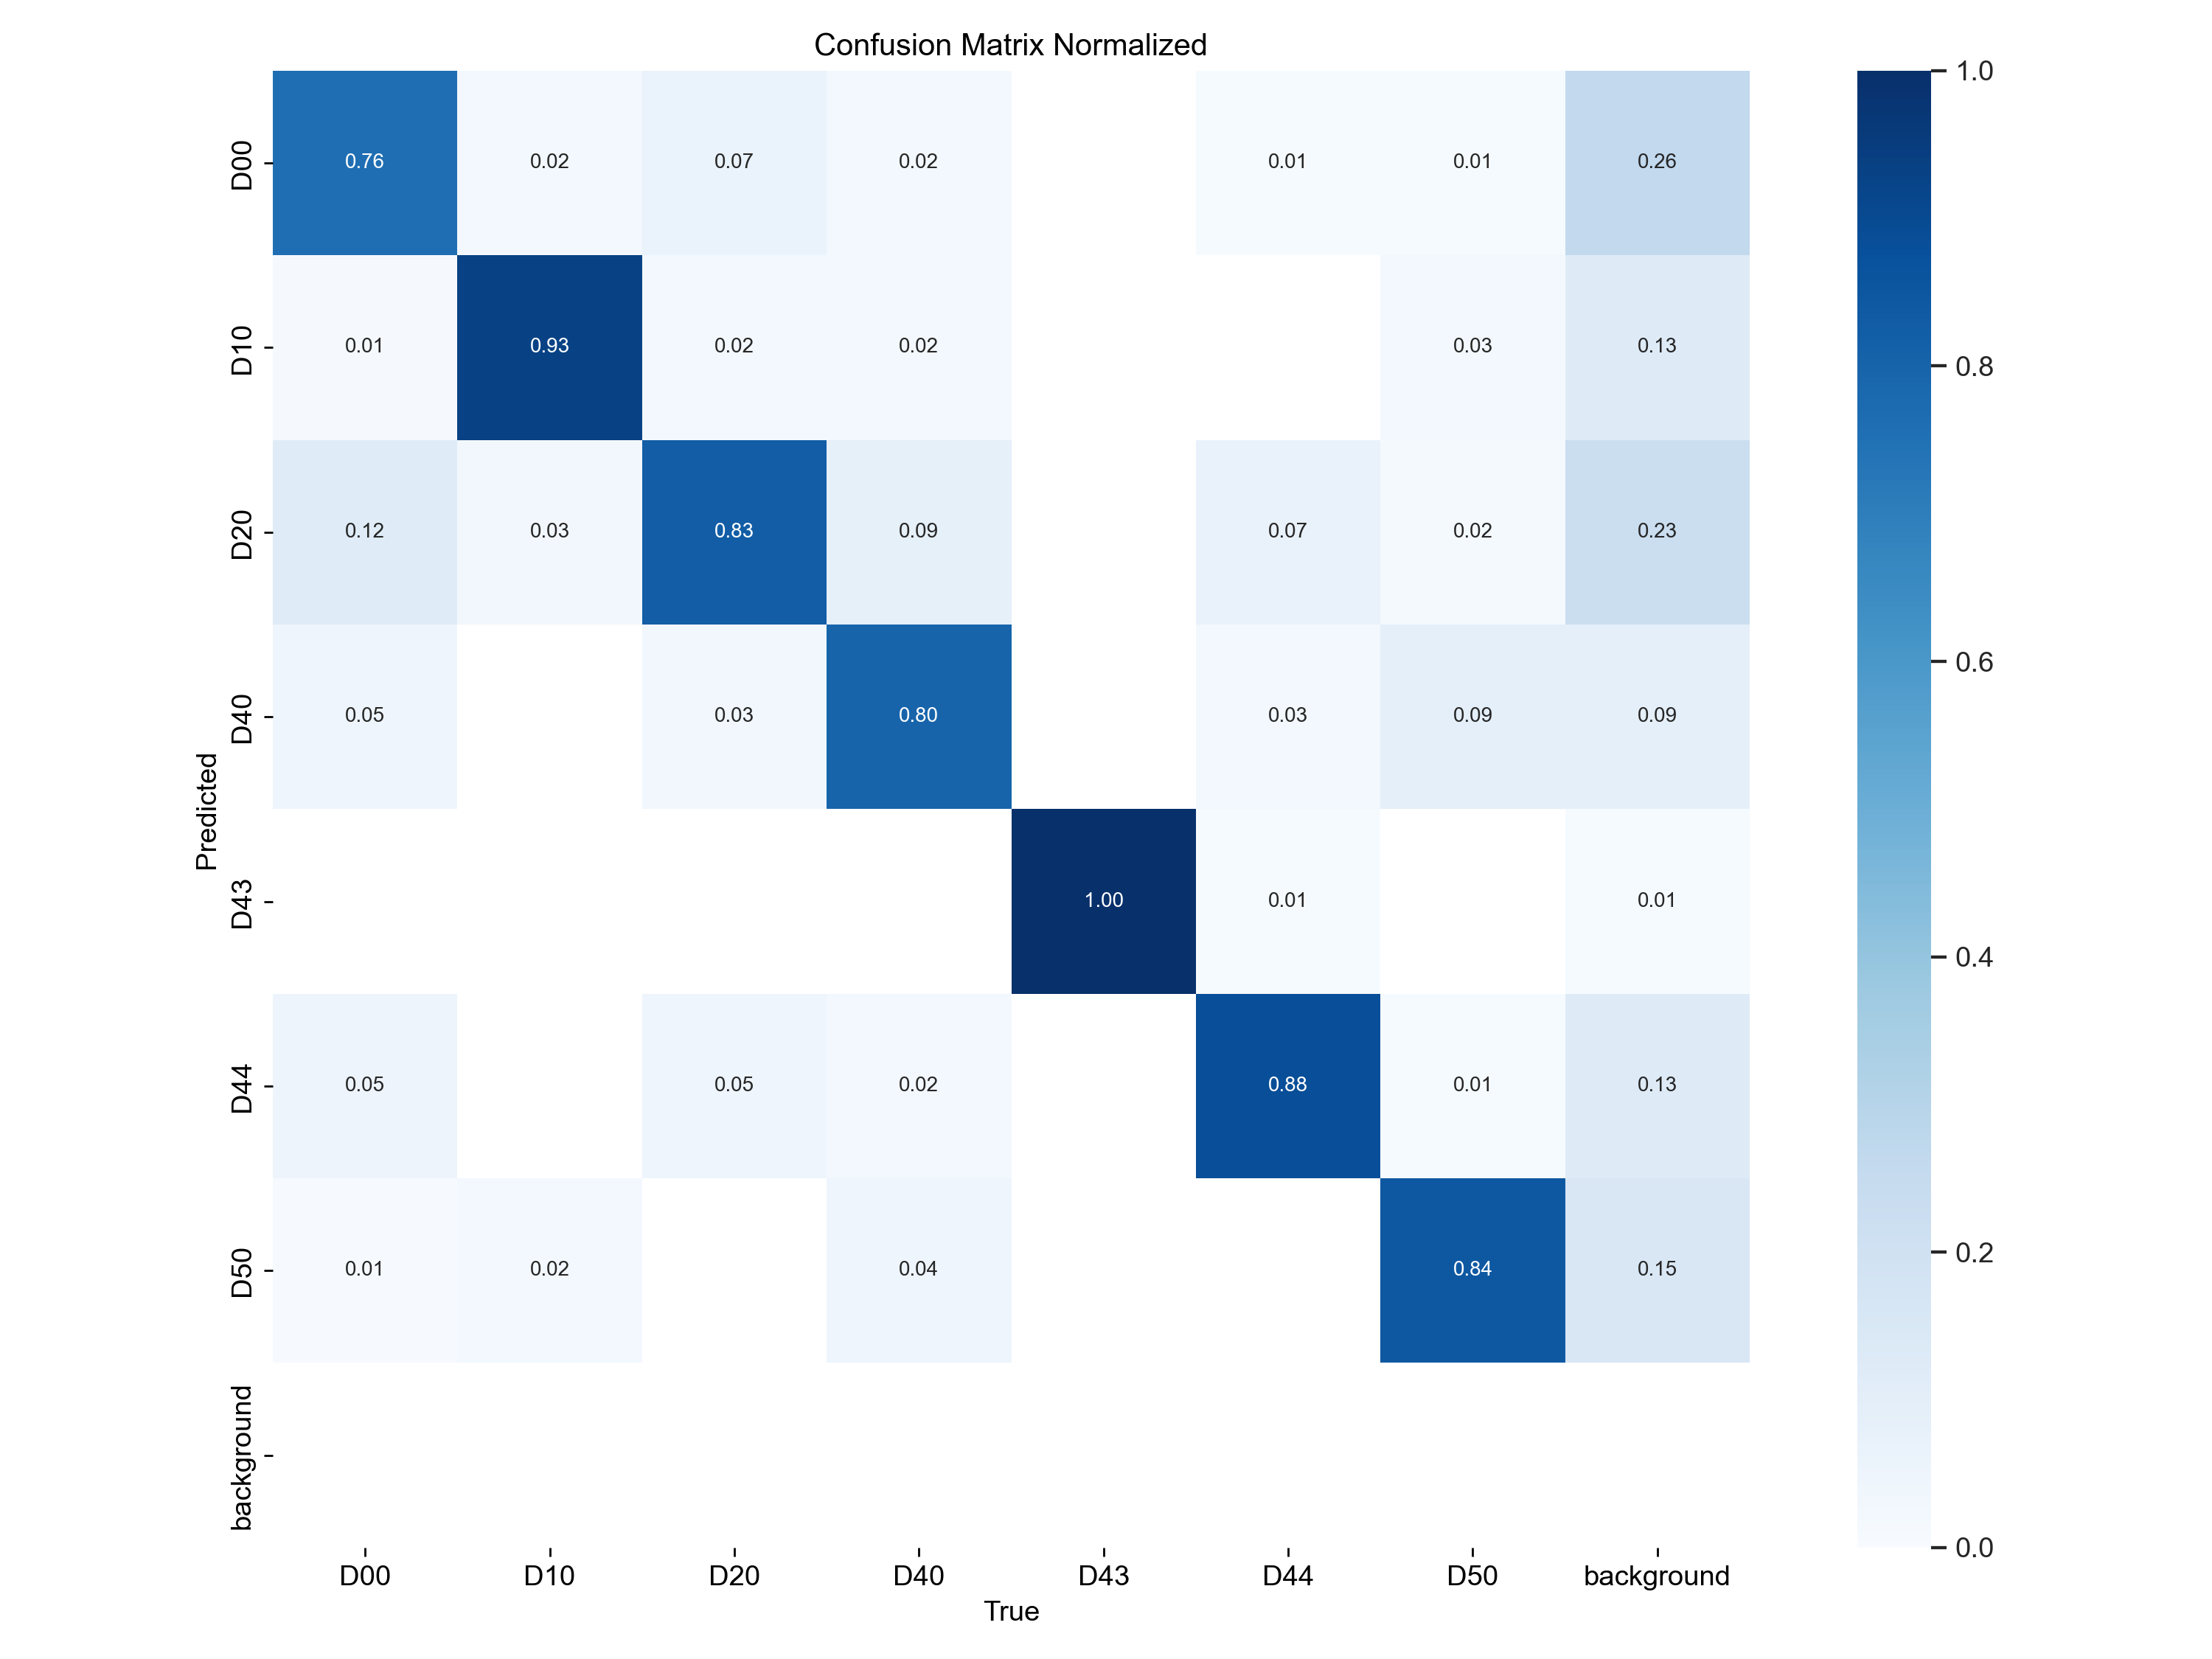

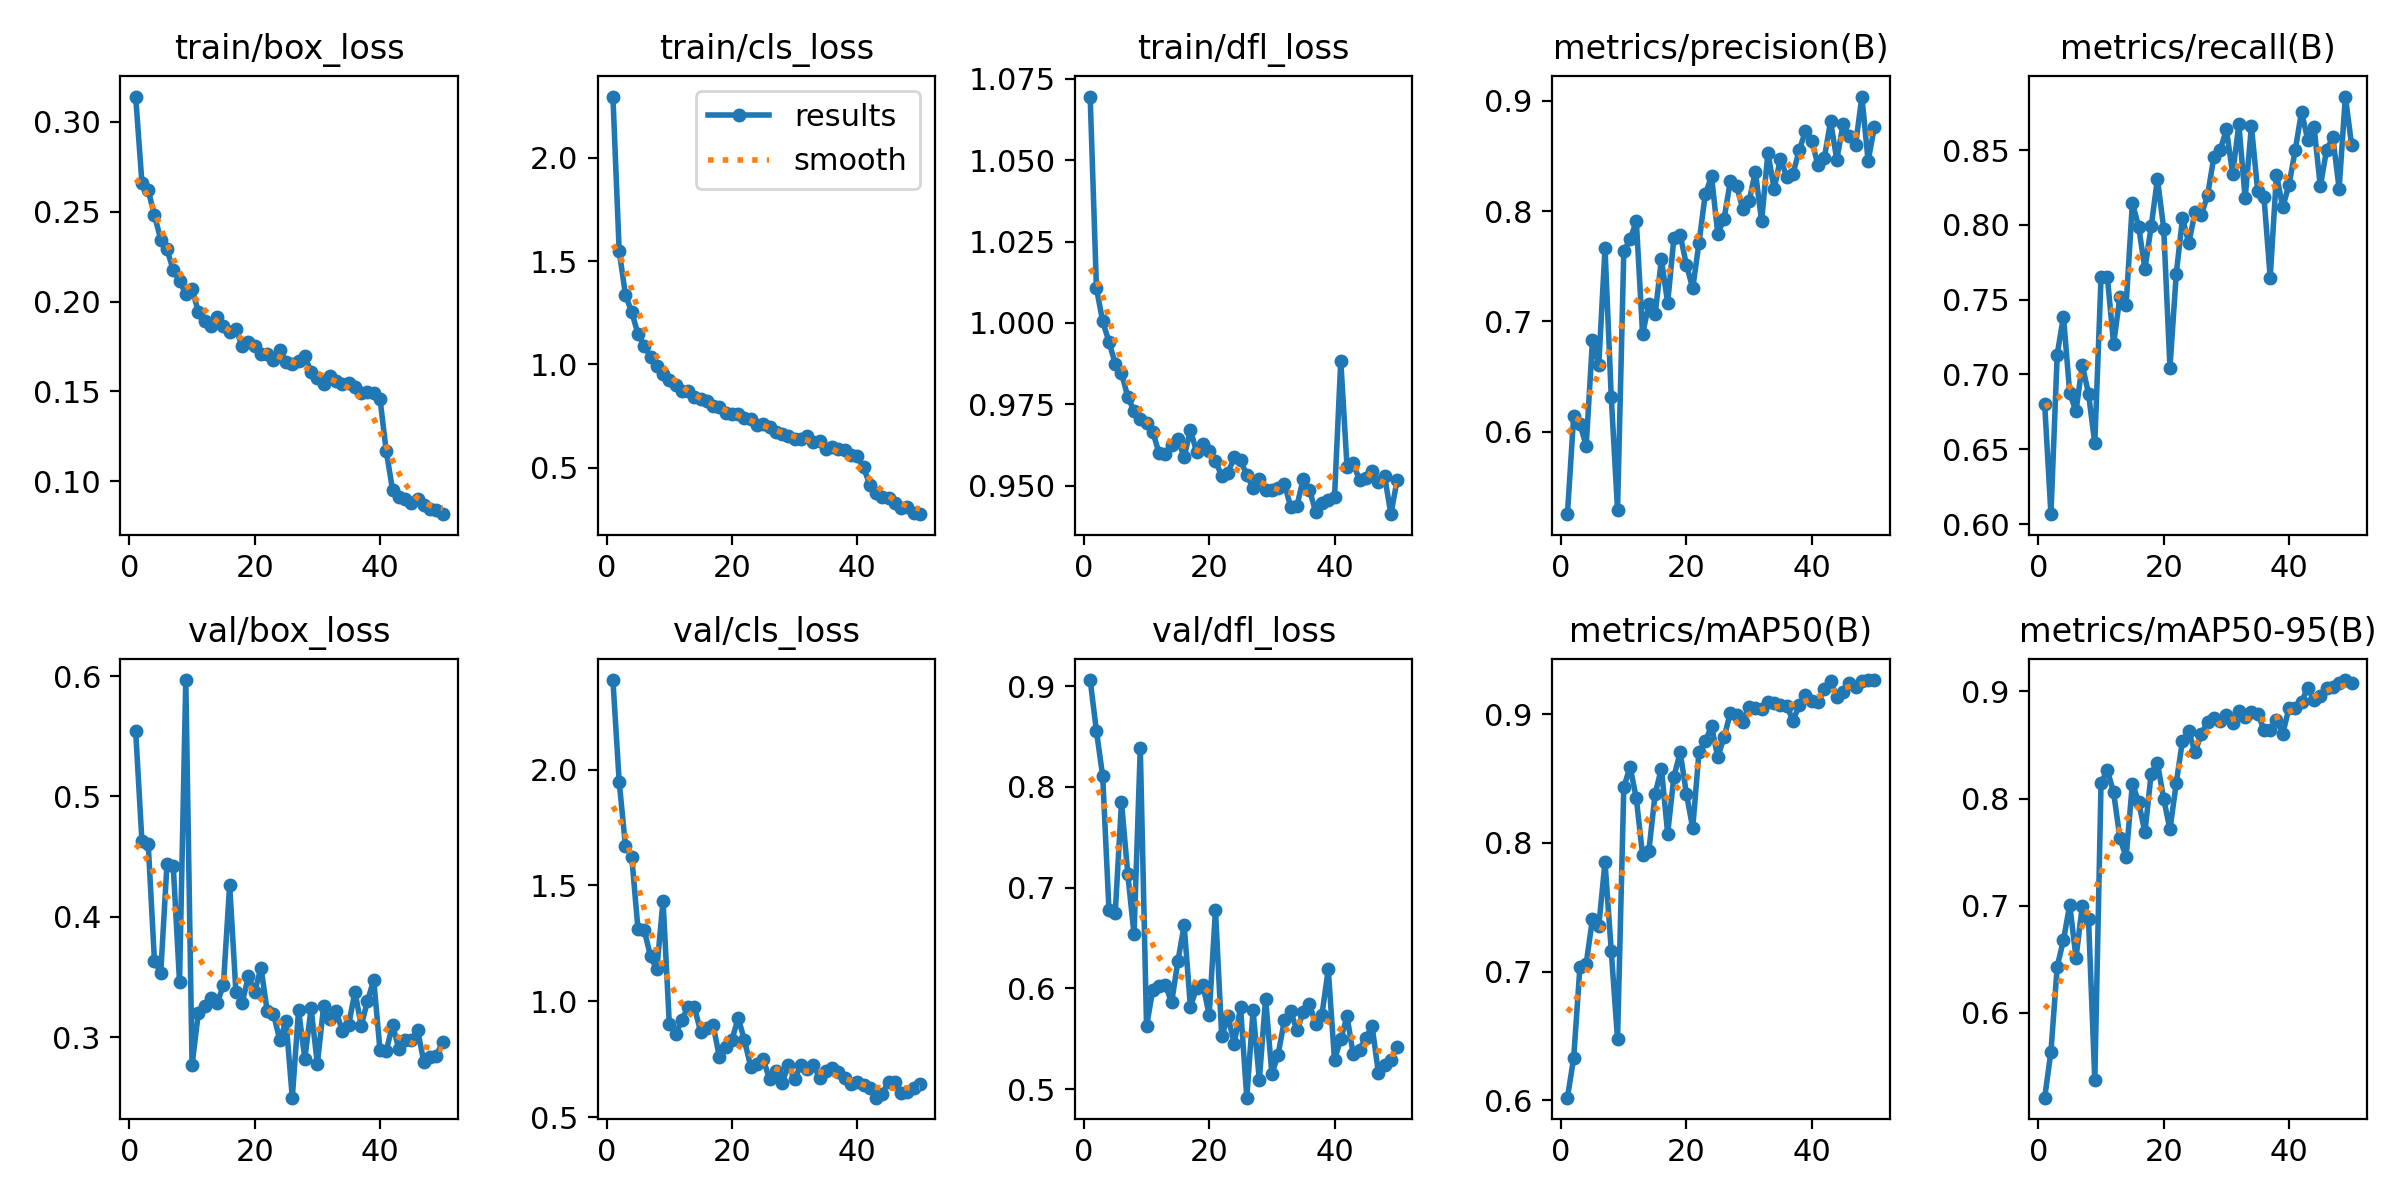

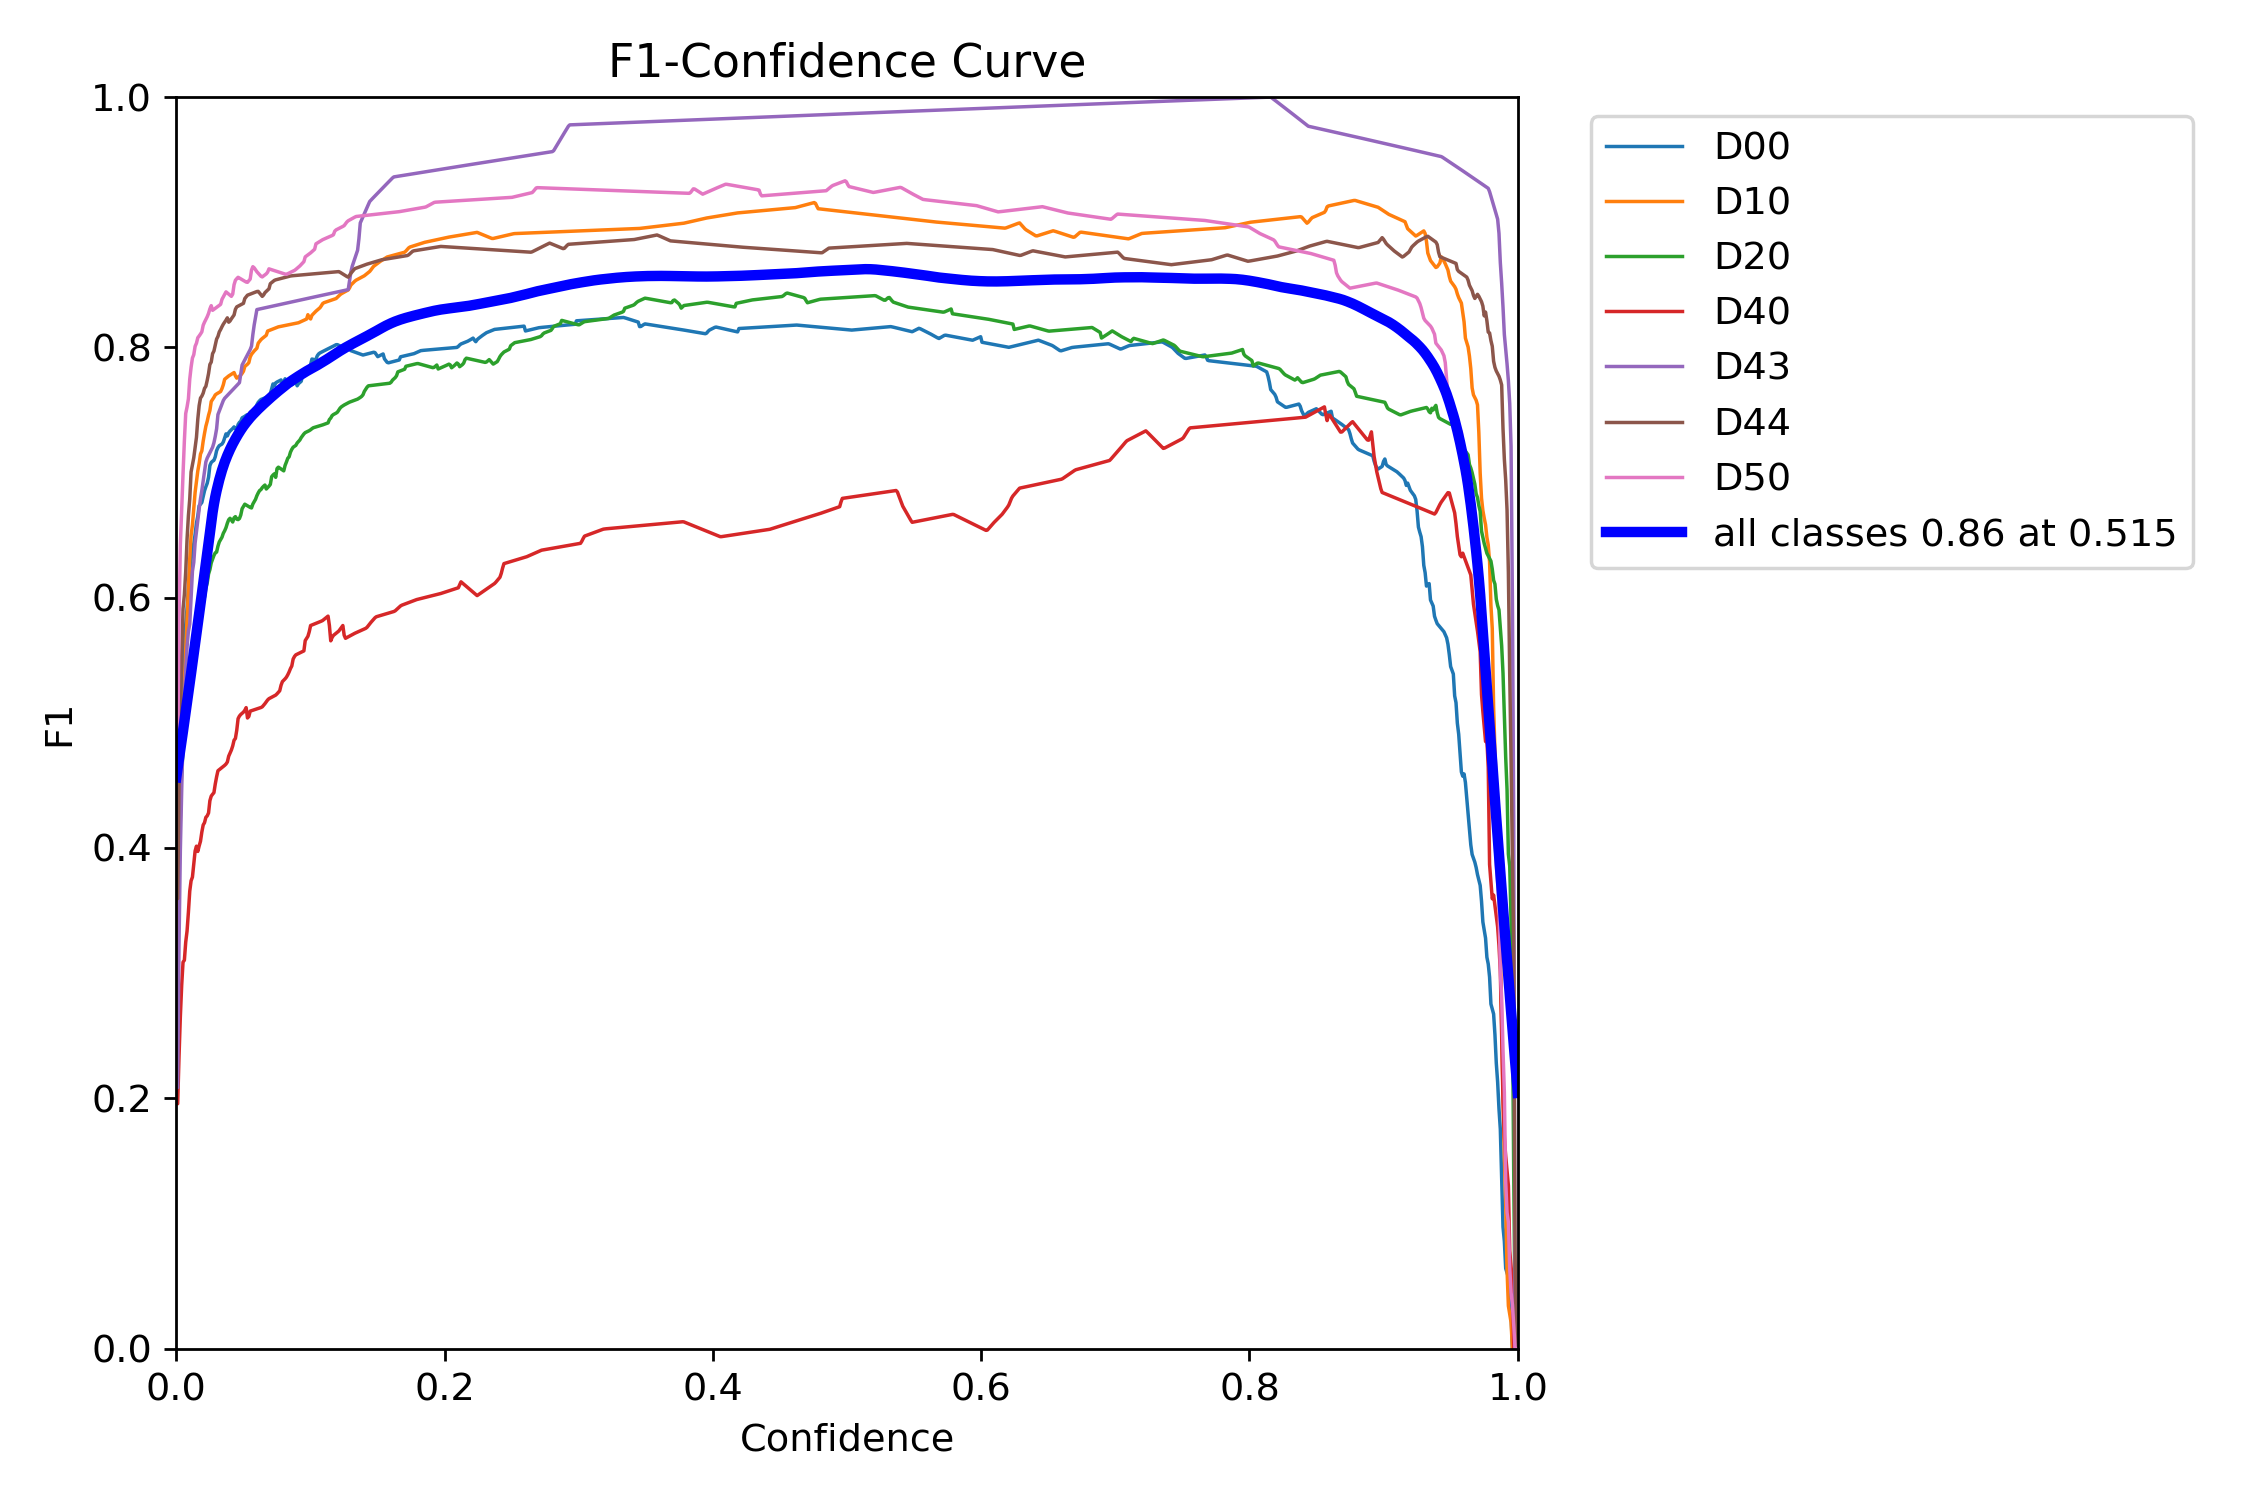


Training Results (CSV):


,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,603.199,0.31406,2.29553,1.06959,0.52500,0.68027,0.60195,0.52071,0.55434,2.38670,0.90609,0.000301,0.000301,0.000301
1,2,1189.140,0.26602,1.54845,1.01070,0.61394,0.60658,0.63275,0.56359,0.46273,1.94765,0.85551,0.000592,0.000592,0.000592
2,3,1773.720,0.26184,1.33679,1.00045,0.60672,0.71331,0.70376,0.64313,0.46075,1.67107,0.81058,0.000871,0.000871,0.000871
3,4,2359.010,0.24806,1.25341,0.99419,0.58713,0.73876,0.70617,0.66781,0.36308,1.62439,0.67783,0.000855,0.000855,0.000855
4,5,2950.080,0.23447,1.14765,0.98742,0.68289,0.68739,0.74101,0.70090,0.35327,1.31190,0.67489,0.000837,0.000837,0.000837
5,6,3532.650,0.22899,1.09002,0.98450,0.66003,0.67547,0.73506,0.65129,0.44388,1.30769,0.78493,0.000819,0.000819,0.000819
6,7,4117.010,0.21743,1.03731,0.97734,0.76629,0.70651,0.78519,0.69953,0.44197,1.19449,0.71381,0.000801,0.000801,0.000801
7,8,4699.210,0.21157,0.98989,0.97289,0.63106,0.68698,0.71582,0.68724,0.34613,1.13763,0.65359,0.000783,0.000783,0.000783
8,9,5281.220,0.20414,0.95554,0.97032,0.52908,0.65402,0.64743,0.53690,0.59675,1.43390,0.83846,0.000765,0.000765,0.000765
9,10,5867.270,0.20704,0.92386,0.96911,0.76353,0.76504,0.84323,0.81456,0.27675,0.90357,0.56268,0.000747,0.000747,0.000747


In [18]:
from IPython.display import Image, display
import os
import pandas as pd

# Path folder hasil model
base_path = r"C:\Users\fatur\Documents\Source Code Project VK__IF-45-DSIS.03_Kelompok 7_Road Damages Object Detection\YOLOv8\Hasil Model\train"

# Path masing-masing file
confusion_matrix_path = os.path.join(base_path, "confusion_matrix.png")
confusion_matrix_normalized_path = os.path.join(base_path, "confusion_matrix_normalized.png")
results_graph_path = os.path.join(base_path, "results.png")
f1_curve_path = os.path.join(base_path, "F1_curve.png")
results_csv_path = os.path.join(base_path, "results.csv")

# **1. Menampilkan gambar dengan IPython.display.Image**
# Confusion Matrix
display(Image(filename=confusion_matrix_path, width=600, height=600))

# Confusion Matrix Normalized
display(Image(filename=confusion_matrix_normalized_path, width=600, height=600))

# Training Results
display(Image(filename=results_graph_path, width=800, height=400))

# F1 Confidence Curve
display(Image(filename=f1_curve_path, width=800, height=400))

# **2. Membaca dan menampilkan seluruh isi CSV**
# Membaca file CSV
results_df = pd.read_csv(results_csv_path)

# Tampilkan semua isi CSV
print("\nTraining Results (CSV):")
pd.set_option('display.max_rows', None)  # Tampilkan semua baris
pd.set_option('display.max_columns', None)  # Tampilkan semua kolom
display(results_df)  # Untuk tampilan tabel di Jupyter/Google Colab

In [15]:
from ultralytics import YOLO
import os
from IPython.display import Image, display

# Path folder hasil model
model_path = r"C:\Users\fatur\Documents\Source Code Project VK__IF-45-DSIS.03_Kelompok 7_Road Damages Object Detection\YOLOv8\Hasil Model\train"

# Path file model terbaik
best_model_path = os.path.join(model_path, "weights", "best.pt")

# Path folder dataset
data_yaml_path = r"C:\Users\fatur\Documents\Source Code Project VK__IF-45-DSIS.03_Kelompok 7_Road Damages Object Detection\Dataset\data.yaml"

# Path folder untuk menyimpan hasil validasi
validation_save_dir = os.path.join(model_path, "validation_results")
os.makedirs(validation_save_dir, exist_ok=True)

# Inisialisasi model dari file terbaik
model = YOLO(best_model_path)

# Validasi model pada dataset validasi
metrics = model.val(data=data_yaml_path, save_dir=validation_save_dir)

Ultralytics 8.3.55  Python-3.10.0 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
Model summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\fatur\Documents\Source Code Project VK__IF-45-DSIS.03_Kelompok 7_Road Damages Object Detection\D
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:44


                   all        689        689      0.844      0.887      0.926      0.911
                   D00        149        149      0.837      0.793      0.883      0.858
                   D10        102        102      0.873      0.947      0.974      0.964
                   D20        143        143      0.826      0.853      0.907      0.906
                   D40         45         45      0.586        0.8      0.788      0.762
                   D43         22         22      0.973          1      0.995      0.995
                   D44        112        112      0.851      0.911      0.961      0.961
                   D50        116        116       0.96      0.905      0.976      0.927
Speed: 1.4ms preprocess, 54.7ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to C:\Users\fatur\runs\detect\val3


    Menggunakan model YOLOv8 terbaik (best.pt) yang telah dilatih sebelumnya.
    
    Menampilkan metrik evaluasi, termasuk:
    Box(P): Presisi bounding box.
    R: Recall (kemampuan mendeteksi objek yang ada).
    mAP50: Mean Average Precision pada IoU threshold 50%.
    mAP50-95: Mean Average Precision rata-rata pada berbagai IoU thresholds.

Model sangat efisien, dengan waktu inferensi sekitar 55 ms per gambar pada CPU.

*   **Presisi (P):** 0.844 (84.4% dari prediksi adalah benar).
*   **Recall (R):** 0.887 (88.7% dari objek berhasil dideteksi).
*   **mAP50:** 0.926 (92.6%, akurasi tinggi pada IoU 50%).
*   **mAP50-95:** 0.911 (91.1%, akurasi rata-rata pada berbagai threshold IoU).

Ini menunjukkan bahwa model YOLOv8 berhasil memberikan hasil yang baik pada dataset validasi, terutama pada kelas-kelas tertentu seperti Pothole (D10) dan Large Cracks (D43). Namun, beberapa kelas seperti Small Cracks (D40) memerlukan perhatian lebih lanjut.


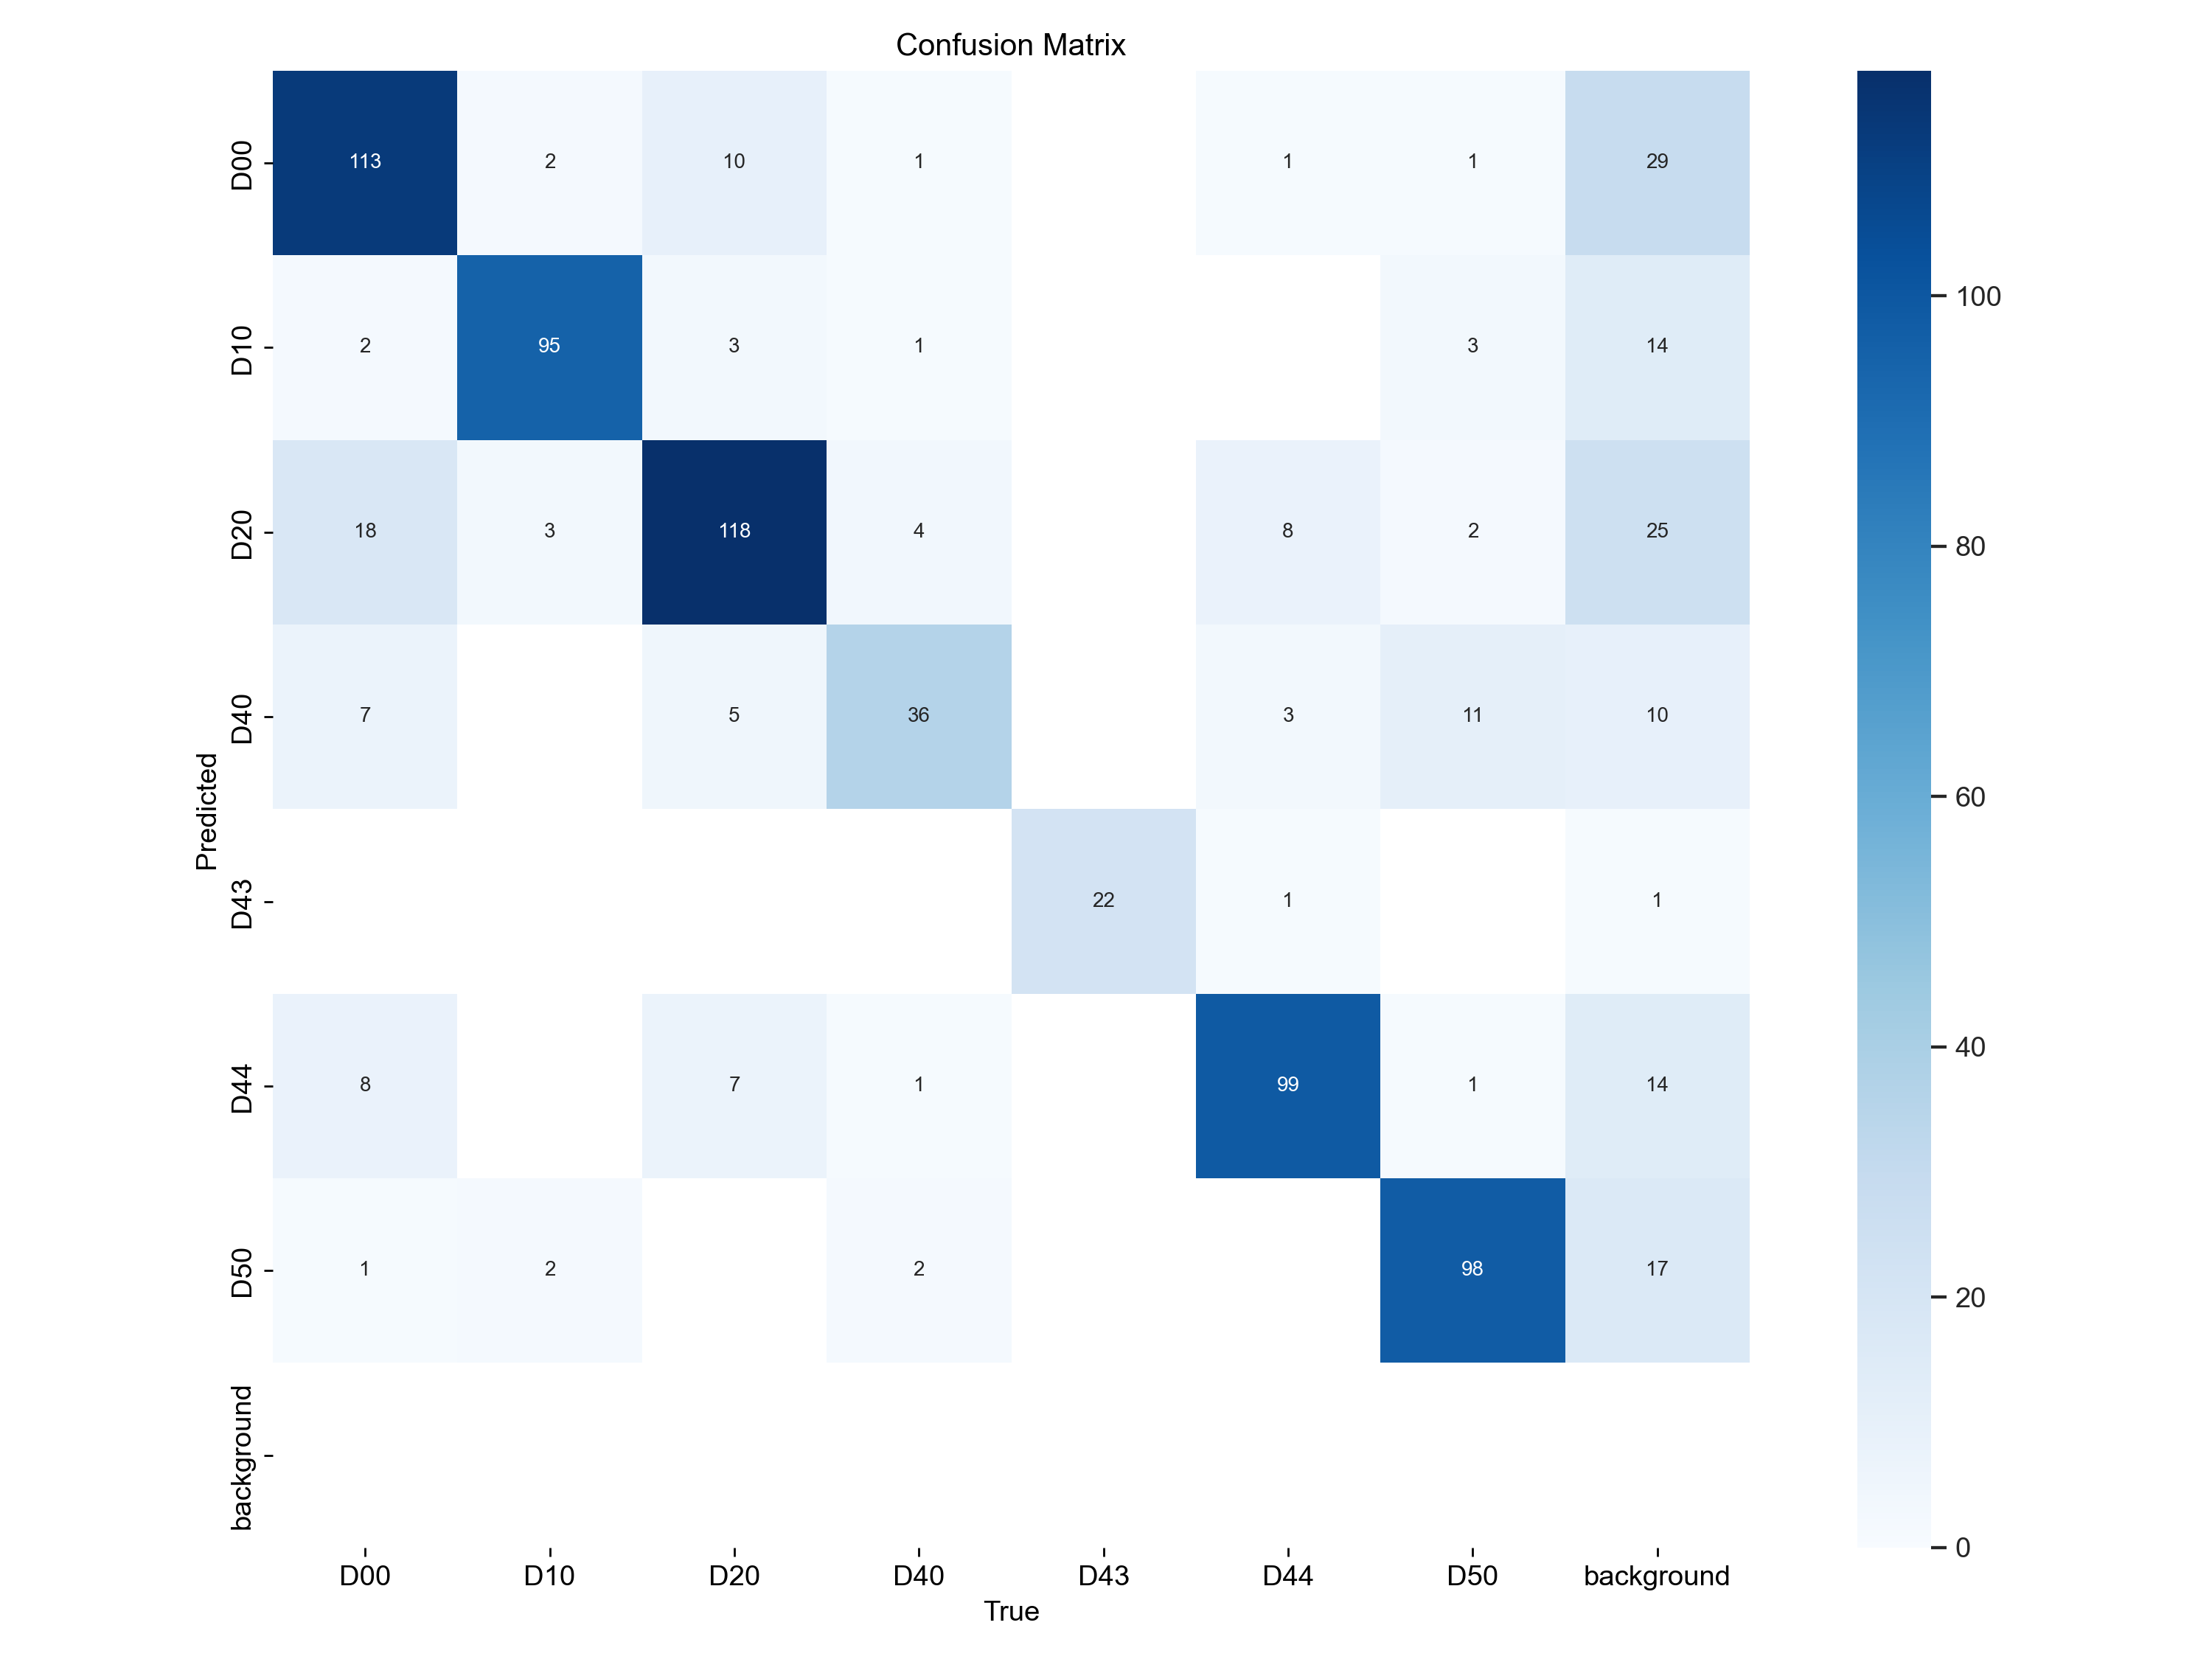

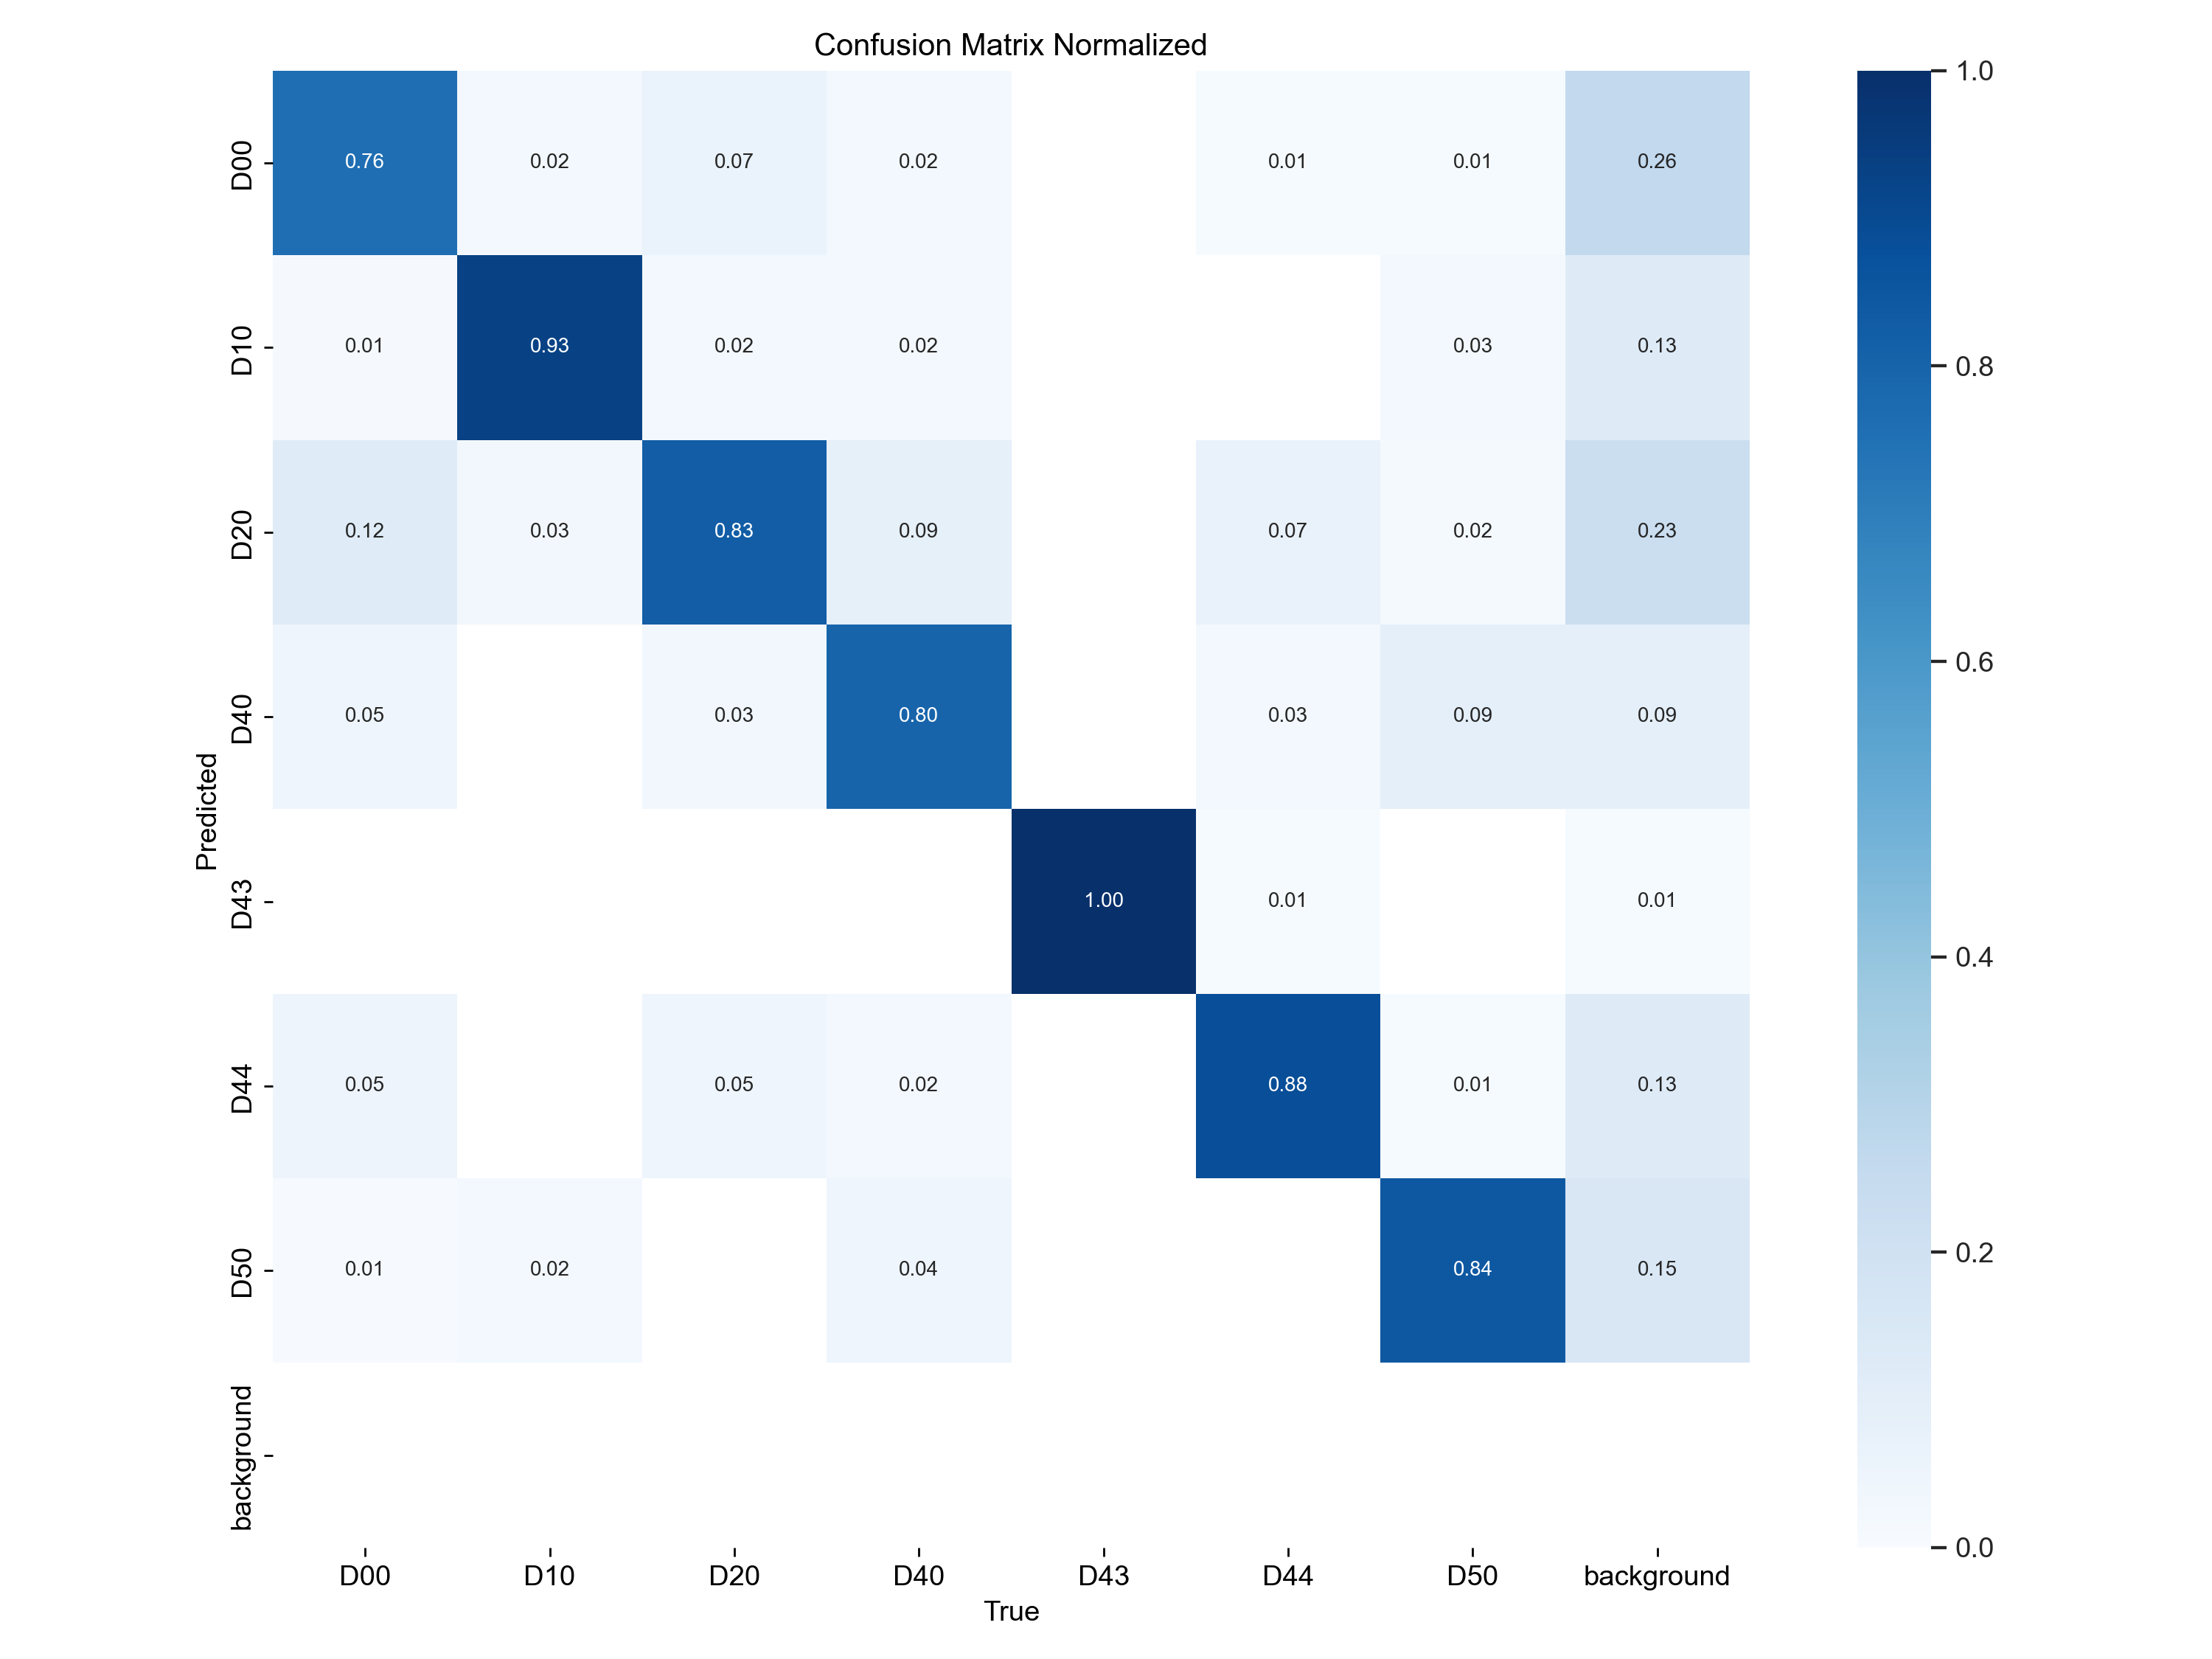

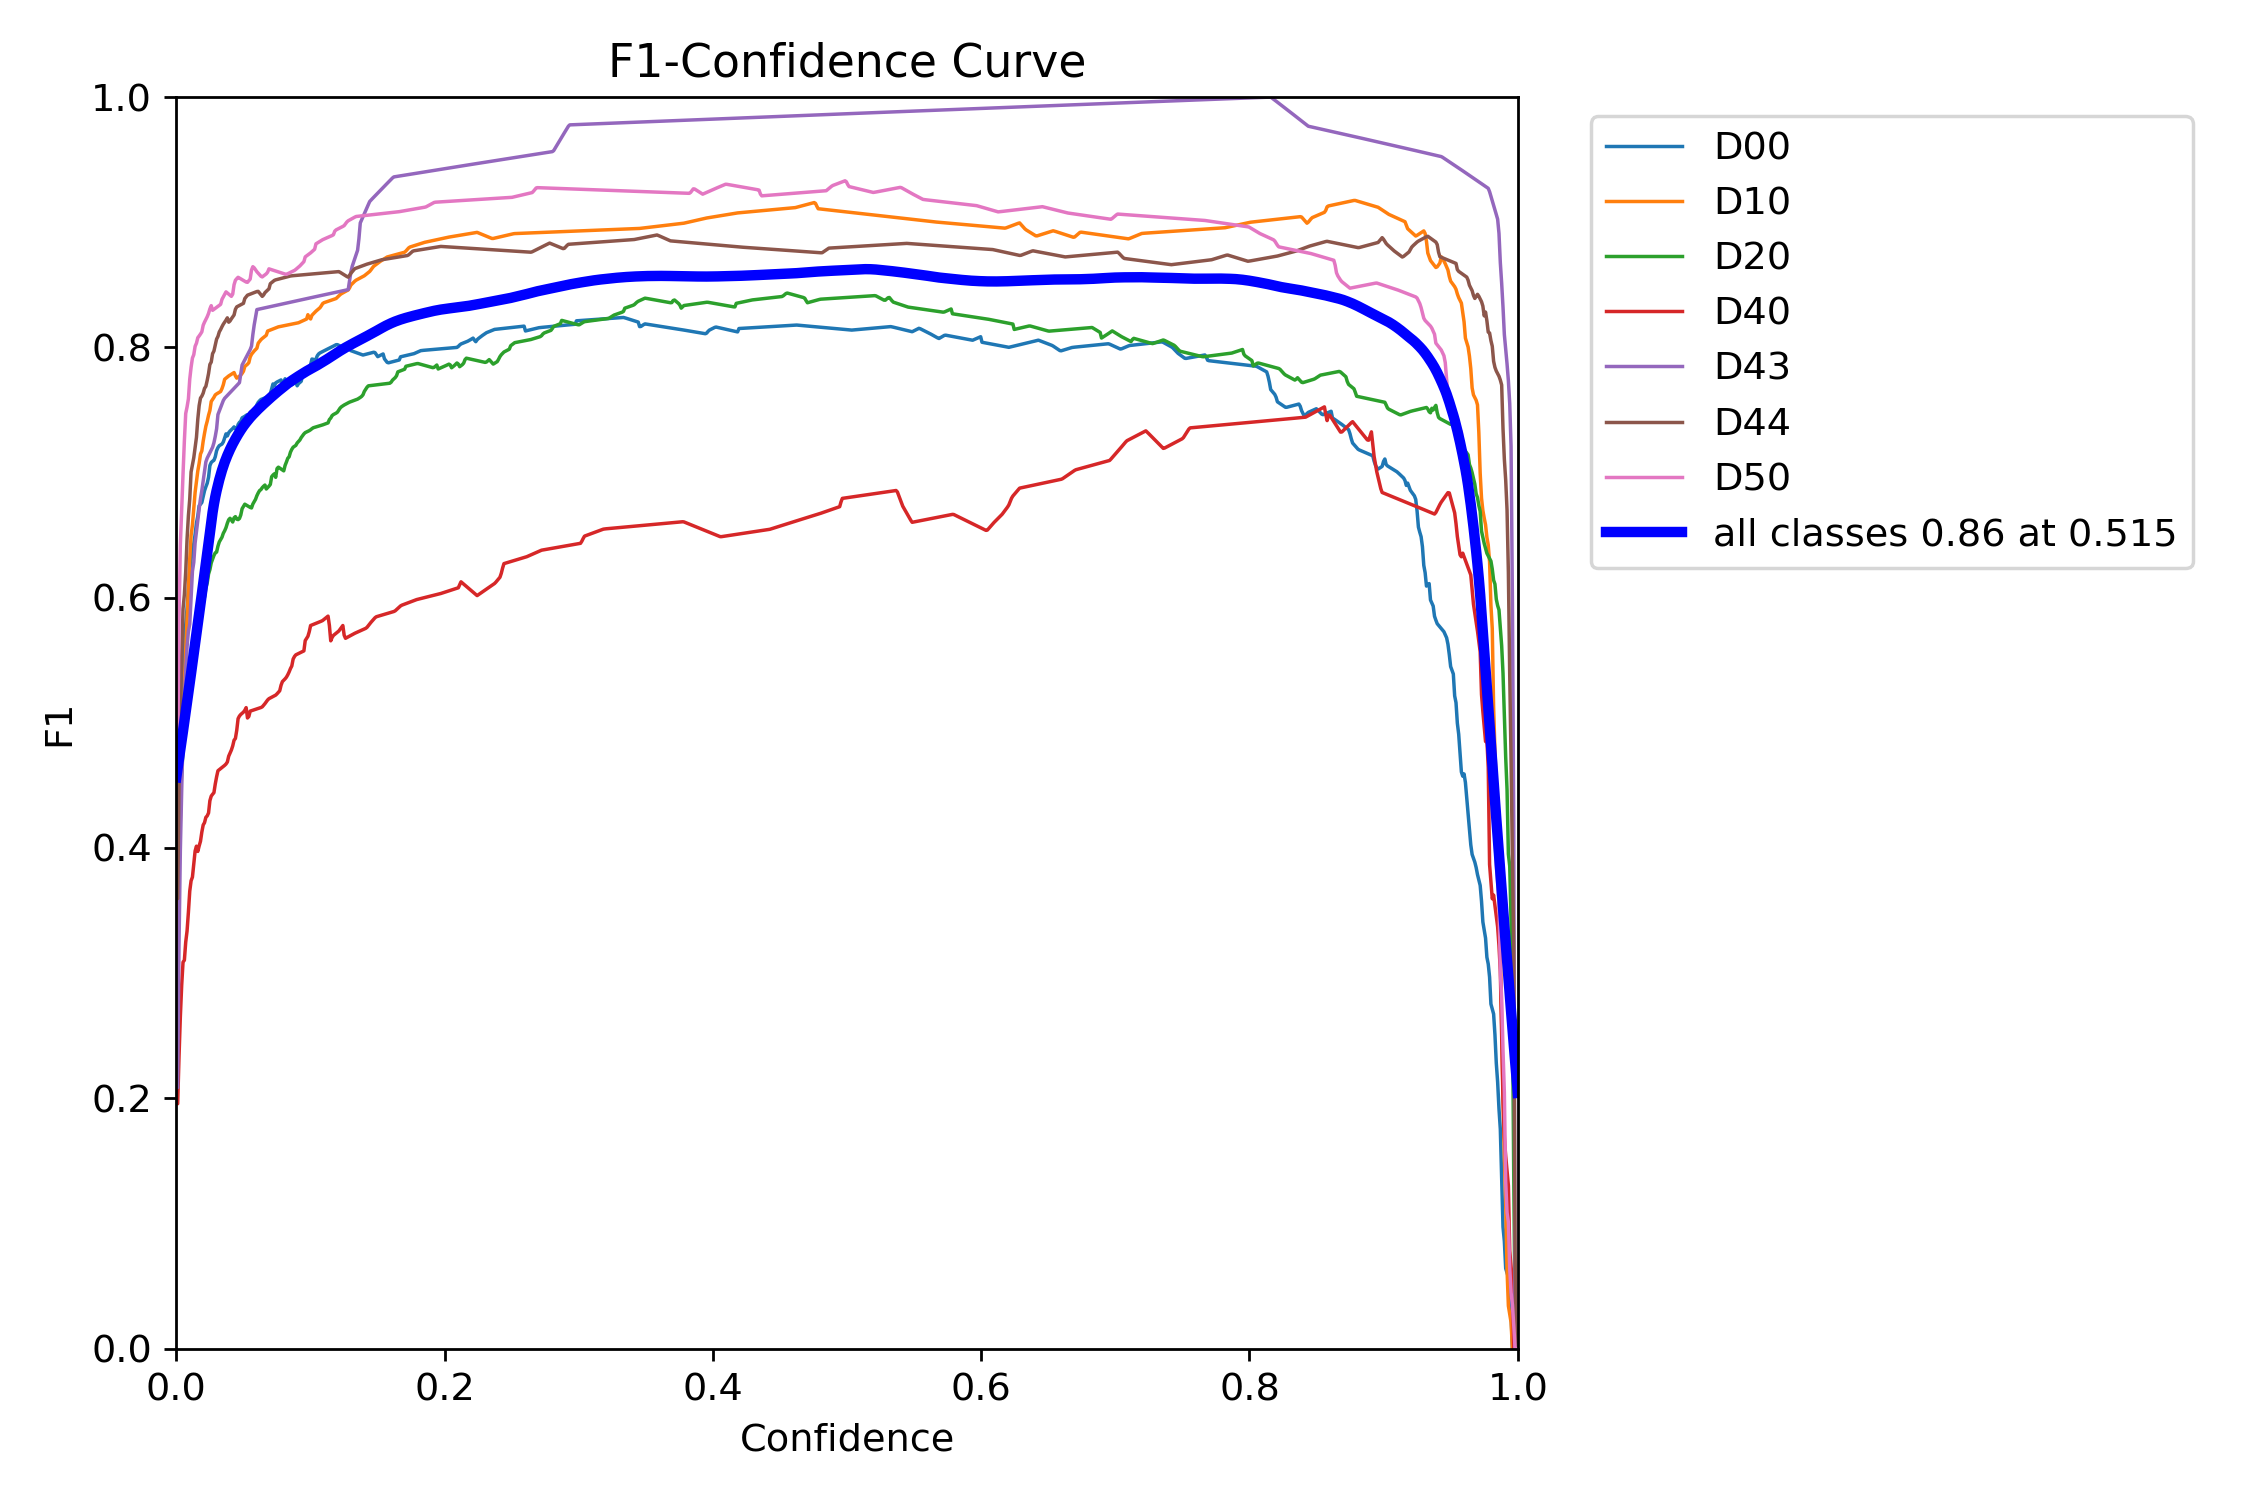

In [17]:
from IPython.display import Image, display
import os

# Path folder hasil validasi
base_path = r"C:\Users\fatur\Documents\Source Code Project VK__IF-45-DSIS.03_Kelompok 7_Road Damages Object Detection\YOLOv8\Hasil Model\train\validation_results\val"

# Path masing-masing file
confusion_matrix_path = os.path.join(base_path, "confusion_matrix.png")
confusion_matrix_normalized_path = os.path.join(base_path, "confusion_matrix_normalized.png")
f1_curve_path = os.path.join(base_path, "F1_curve.png")

# Menampilkan Confusion Matrix
display(Image(filename=confusion_matrix_path, width=600, height=600))

# Menampilkan Confusion Matrix Normalized
display(Image(filename=confusion_matrix_normalized_path, width=600, height=600))

# Menampilkan F1 Confidence Curve
display(Image(filename=f1_curve_path, width=800, height=400))

In [19]:
from ultralytics import YOLO
import os
from IPython.display import Image, display

# Path folder hasil model
model_path = r"C:\Users\fatur\Documents\Source Code Project VK__IF-45-DSIS.03_Kelompok 7_Road Damages Object Detection\YOLOv8\Hasil Model\train"

# Path file model terbaik
best_model_path = os.path.join(model_path, "weights", "best.pt")

# Path folder dataset (file data.yaml)
data_yaml_path = r"C:\Users\fatur\Documents\Source Code Project VK__IF-45-DSIS.03_Kelompok 7_Road Damages Object Detection\Dataset\data.yaml"

# Path folder untuk menyimpan hasil testing
test_save_dir = os.path.join(model_path, "test_results")
os.makedirs(test_save_dir, exist_ok=True)

# Inisialisasi model dari file terbaik
model = YOLO(best_model_path)

# Testing model pada dataset testing
metrics = model.val(data=data_yaml_path, split='test', save_dir=test_save_dir)

Ultralytics 8.3.55  Python-3.10.0 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
Model summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\fatur\Documents\Source Code Project VK__IF-45-DSIS.03_Kelompok 7_Road Damages Object Detection\D

val: New cache created: C:\Users\fatur\Documents\Source Code Project VK__IF-45-DSIS.03_Kelompok 7_Road Damages Object Detection\Dataset\test\labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:26


                   all        402        402      0.891      0.867      0.944      0.929
                   D00         75         75      0.869        0.8      0.922      0.919
                   D10         60         60      0.905      0.953       0.97      0.964
                   D20         91         91      0.854       0.78      0.926      0.925
                   D40         31         31      0.731      0.791       0.87      0.833
                   D43         12         12      0.982          1      0.995      0.985
                   D44         75         75      0.938       0.92      0.977      0.976
                   D50         58         58       0.96      0.827      0.948      0.905
Speed: 1.4ms preprocess, 55.7ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to C:\Users\fatur\runs\detect\val4


    Menggunakan model YOLOv8 terbaik (best.pt) yang telah dilatih sebelumnya.
    
    Menampilkan metrik evaluasi, termasuk:
    Box(P): Presisi bounding box.
    R: Recall (kemampuan mendeteksi objek yang ada).
    mAP50: Mean Average Precision pada IoU threshold 50%.
    mAP50-95: Mean Average Precision rata-rata pada berbagai IoU thresholds.

Waktu inferensi rata-rata adalah 55.7 ms per gambar pada CPU, menunjukkan efisiensi yang memadai.

*   **Presisi (P):** 0.891 (89.1% dari prediksi adalah benar).
*   **Recall (R):** 0.867 (86.7% dari objek berhasil dideteksi).
*   **mAP50:** 0.944 (94.4% pada IoU threshold 50%).
*   **mAP50-95:** 0.929 (92.9% pada berbagai threshold IoU).

Ini menunjukkan bahwa model YOLOv8 mampu memberikan hasil yang baik dalam mendeteksi kerusakan jalan, dengan mAP tinggi untuk sebagian besar kelas. Perbaikan lebih lanjut dapat dilakukan untuk kelas dengan kinerja yang lebih rendah.

Confusion Matrix (Testing):


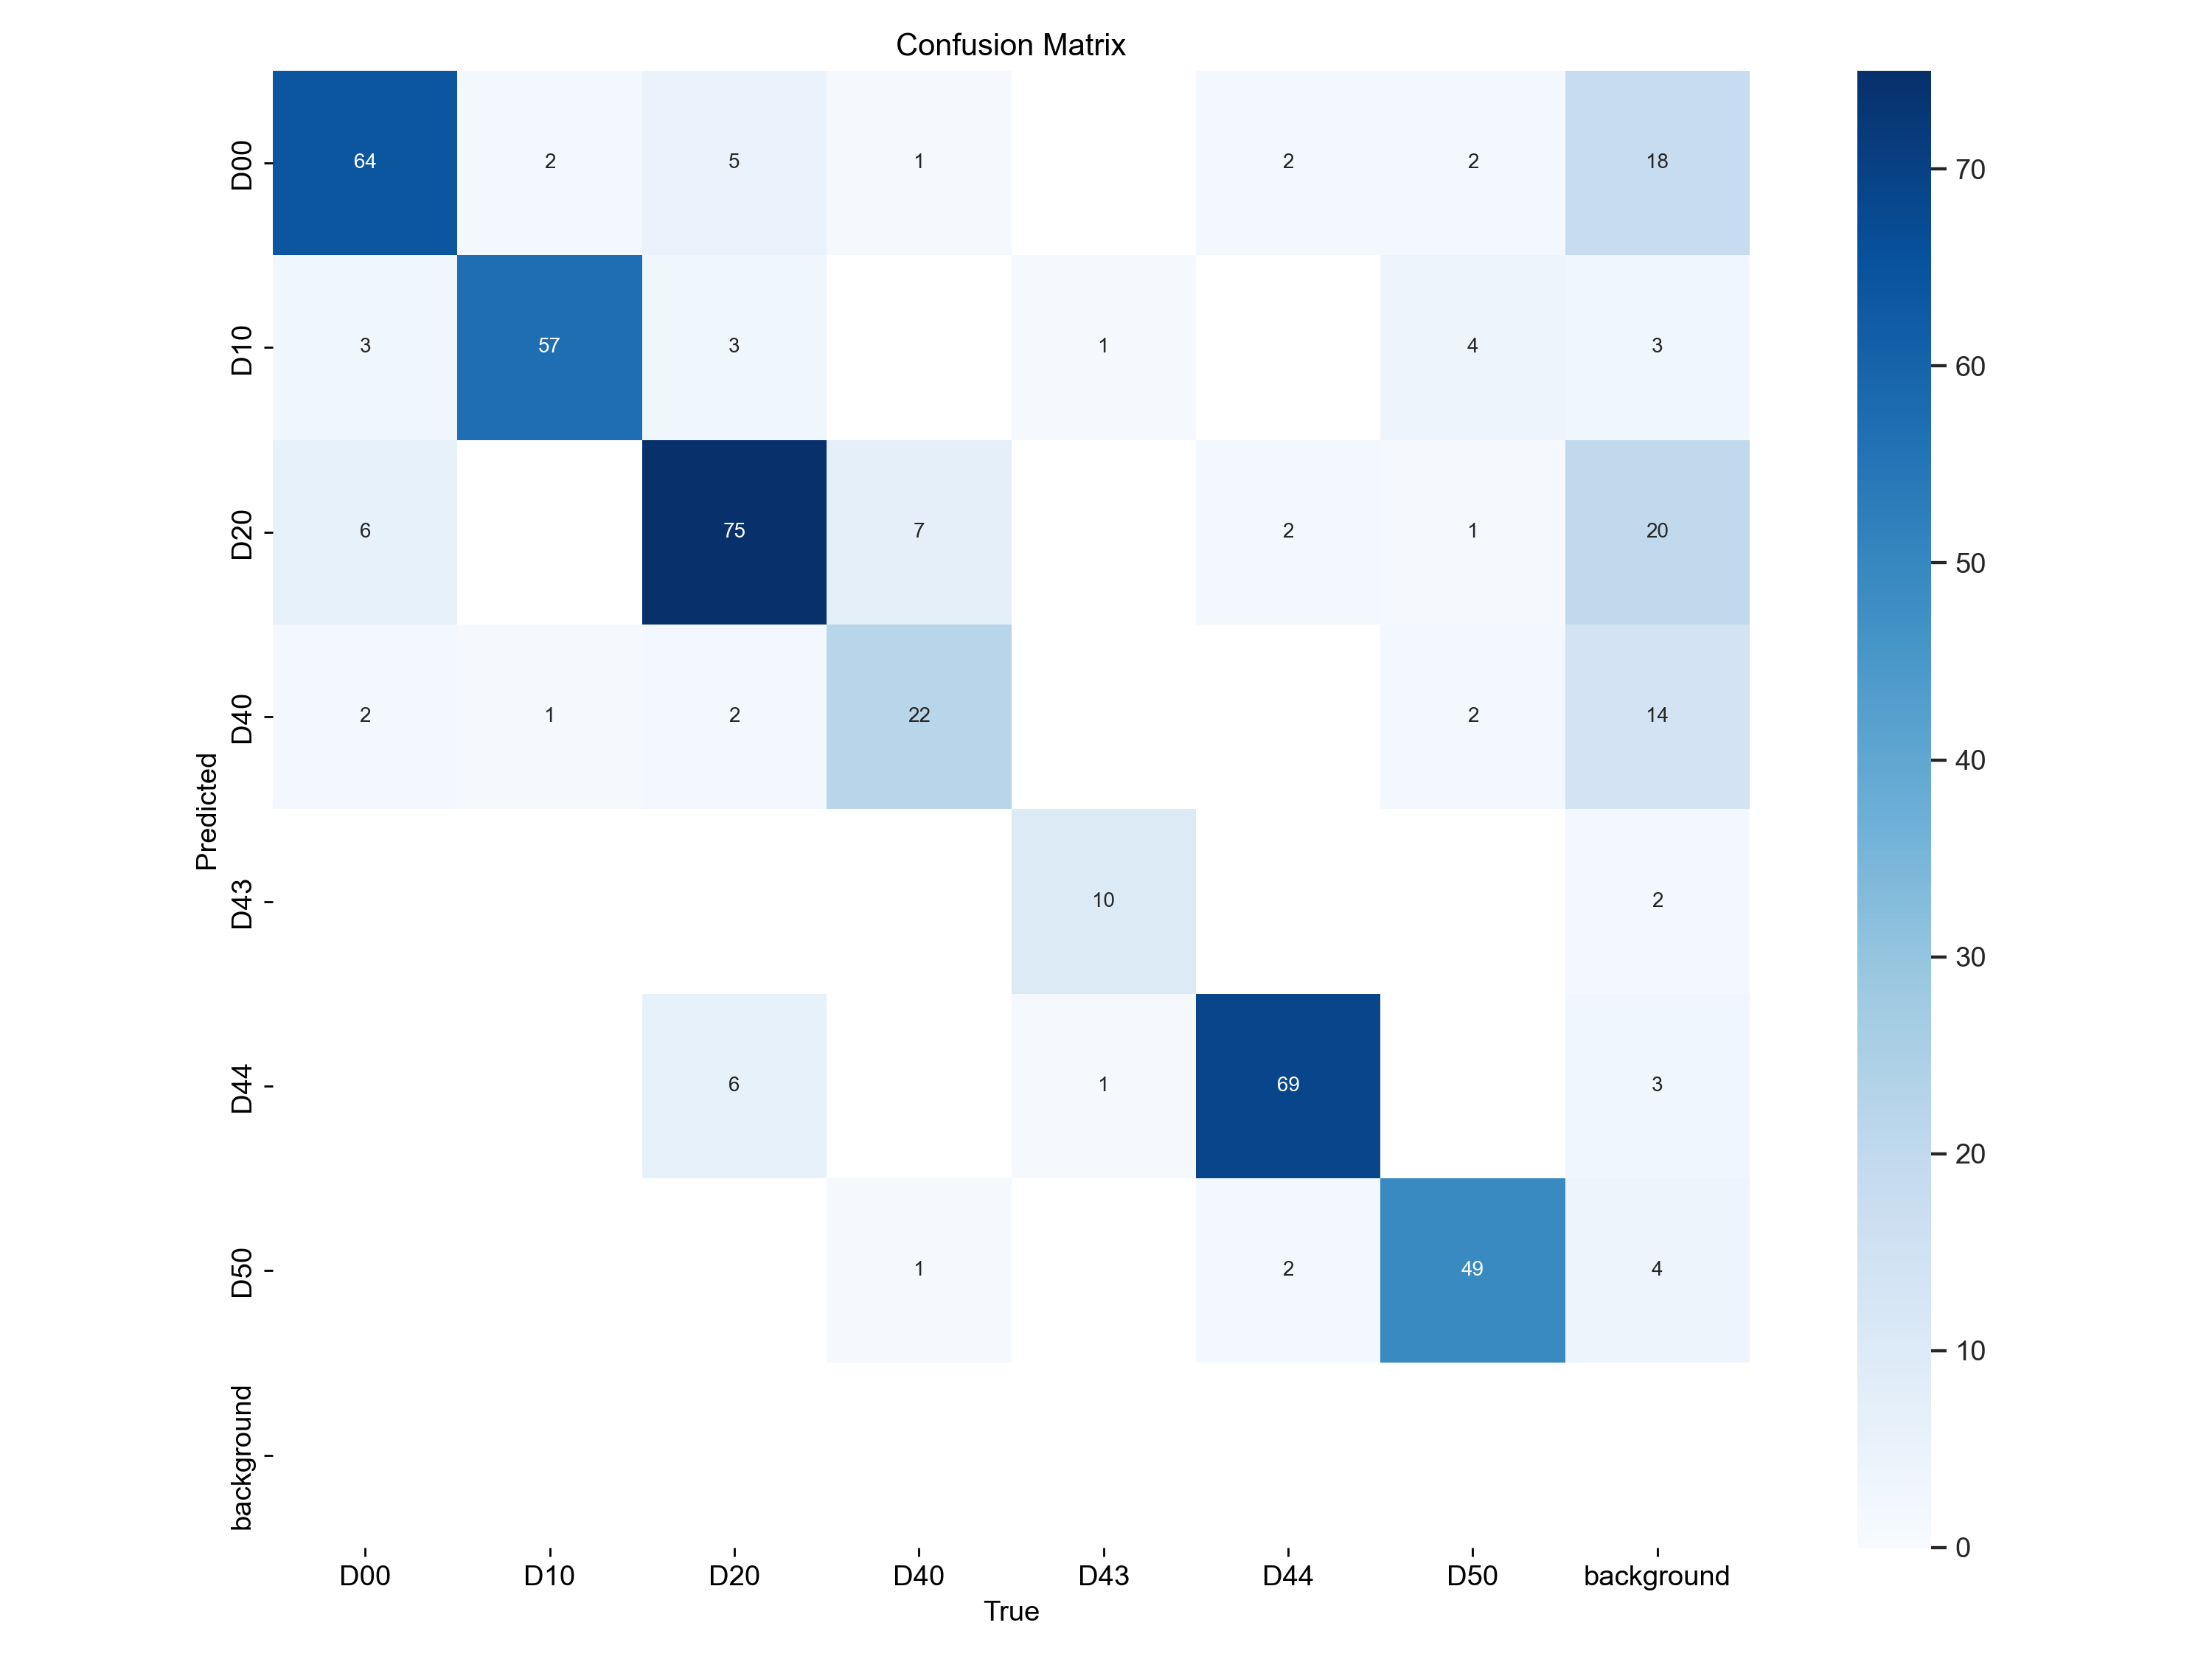

Confusion Matrix Normalized (Testing):


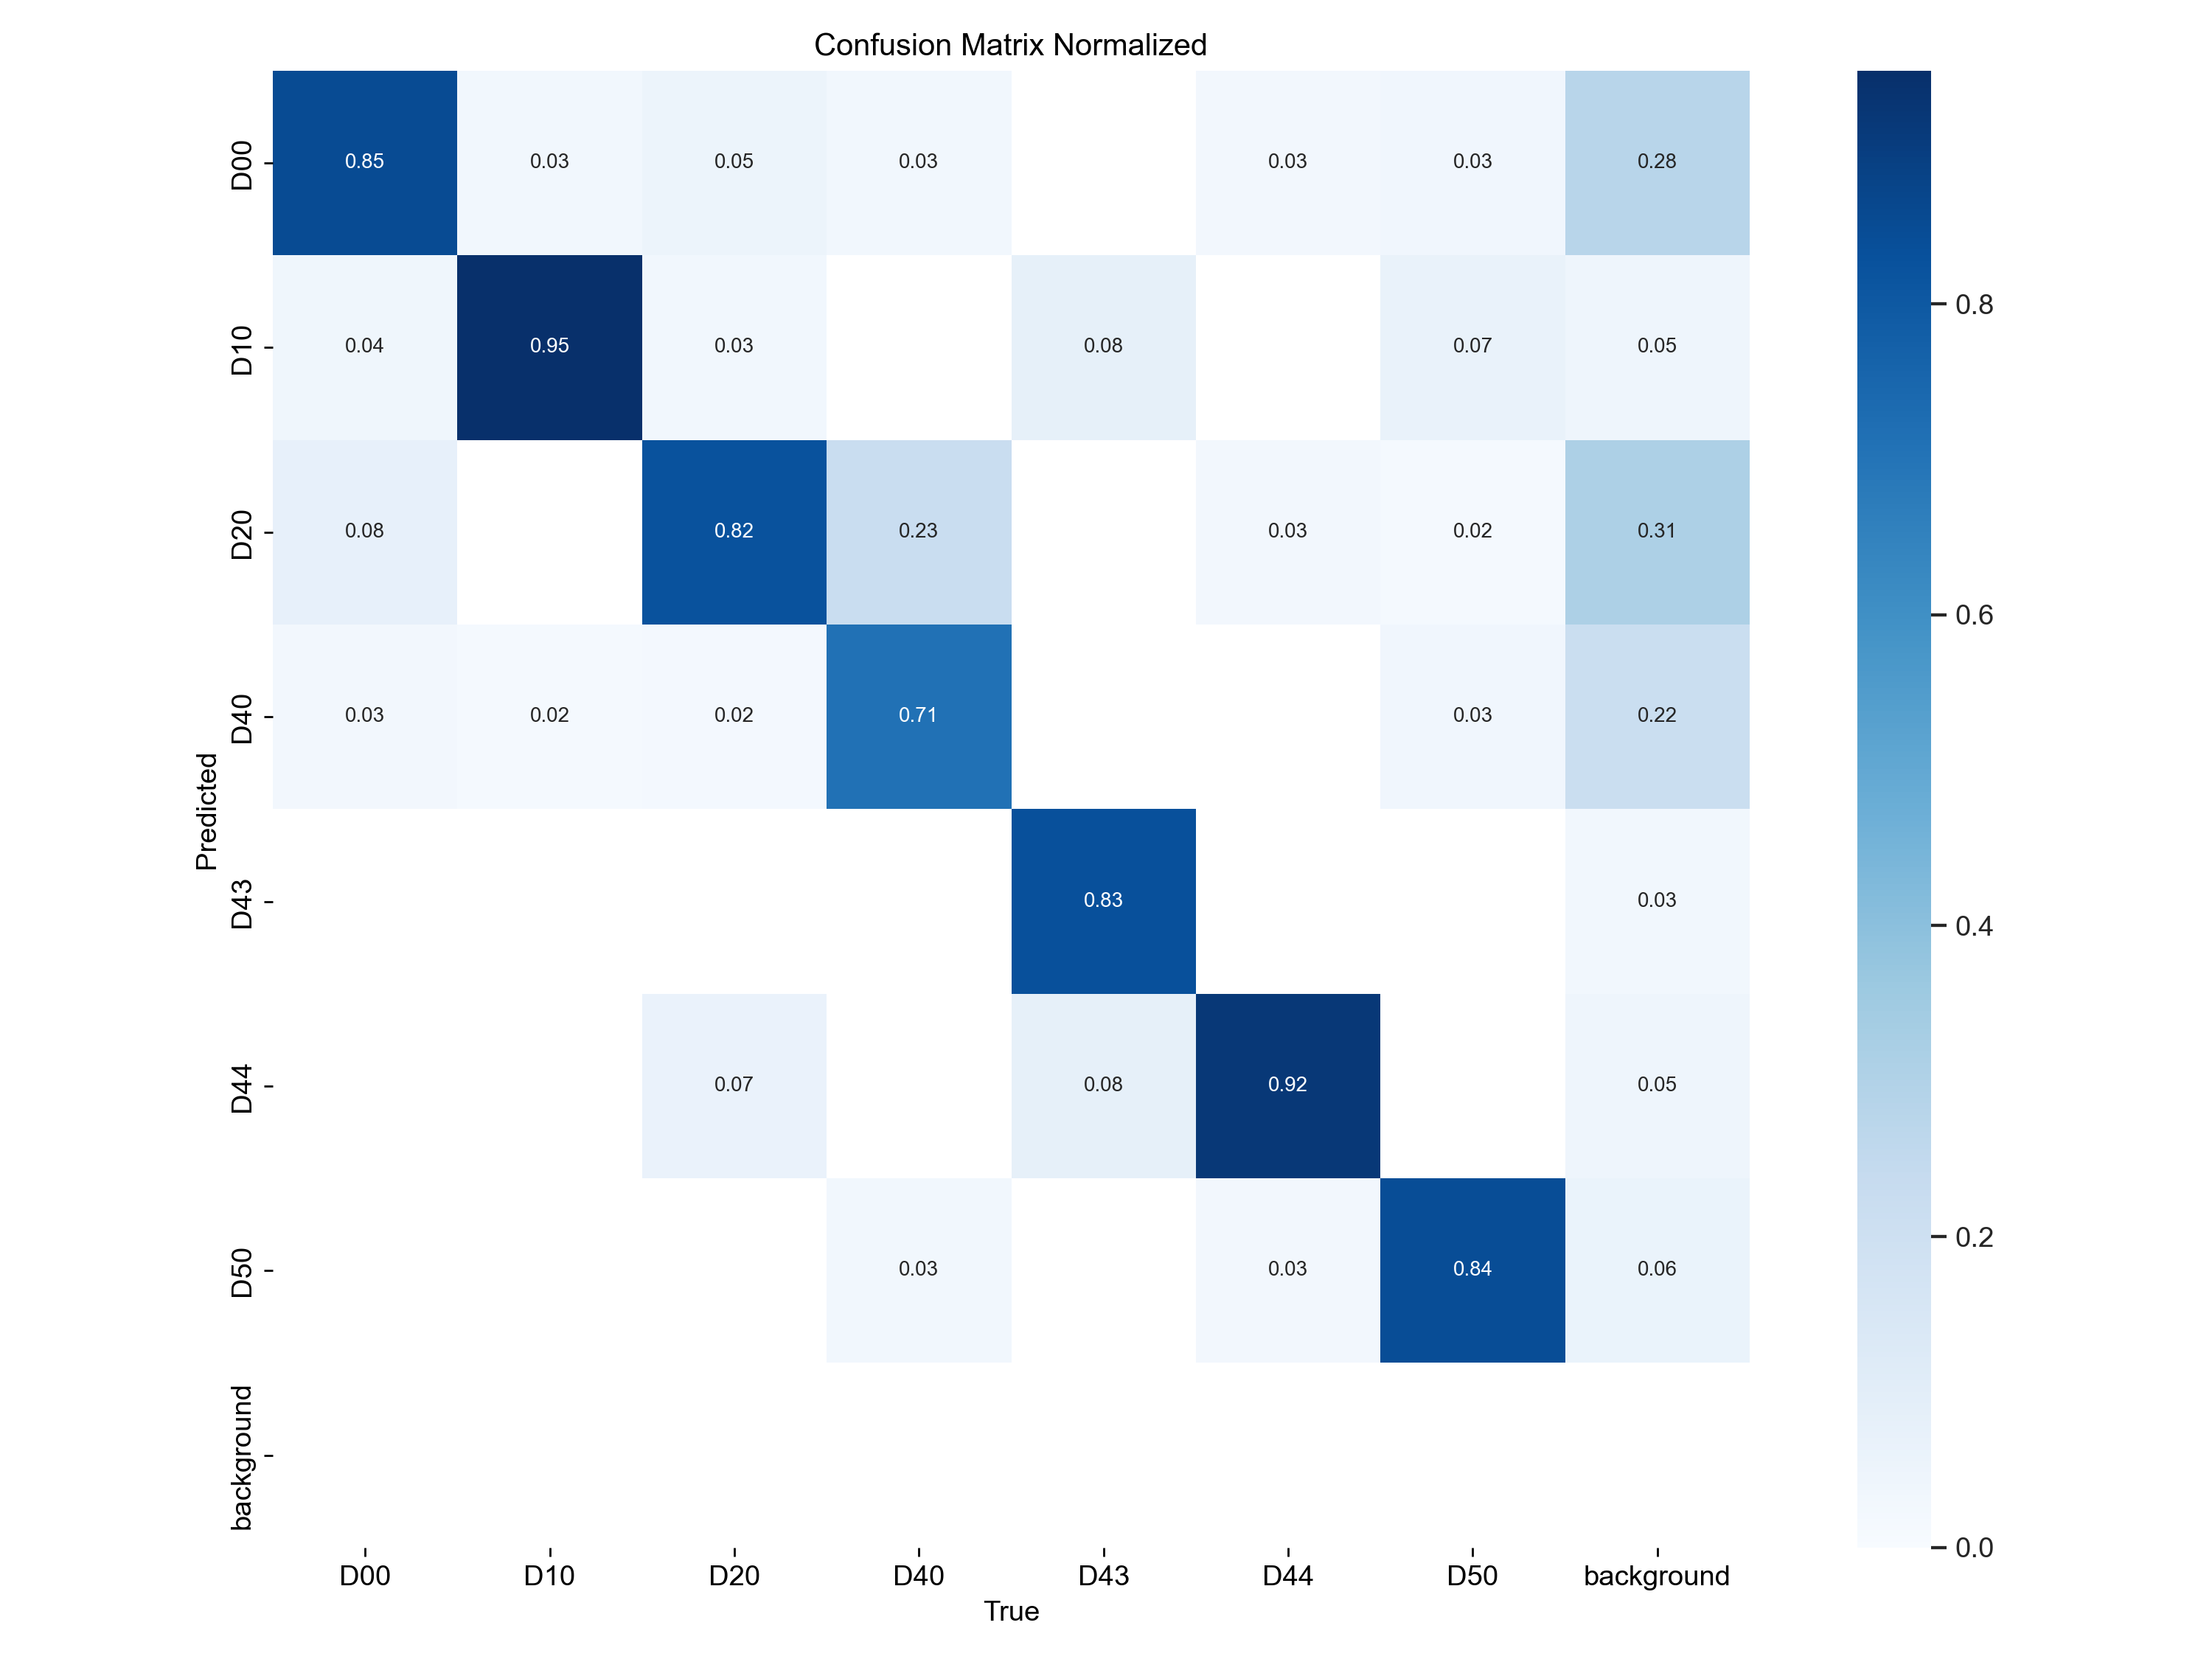

F1 Confidence Curve (Testing):


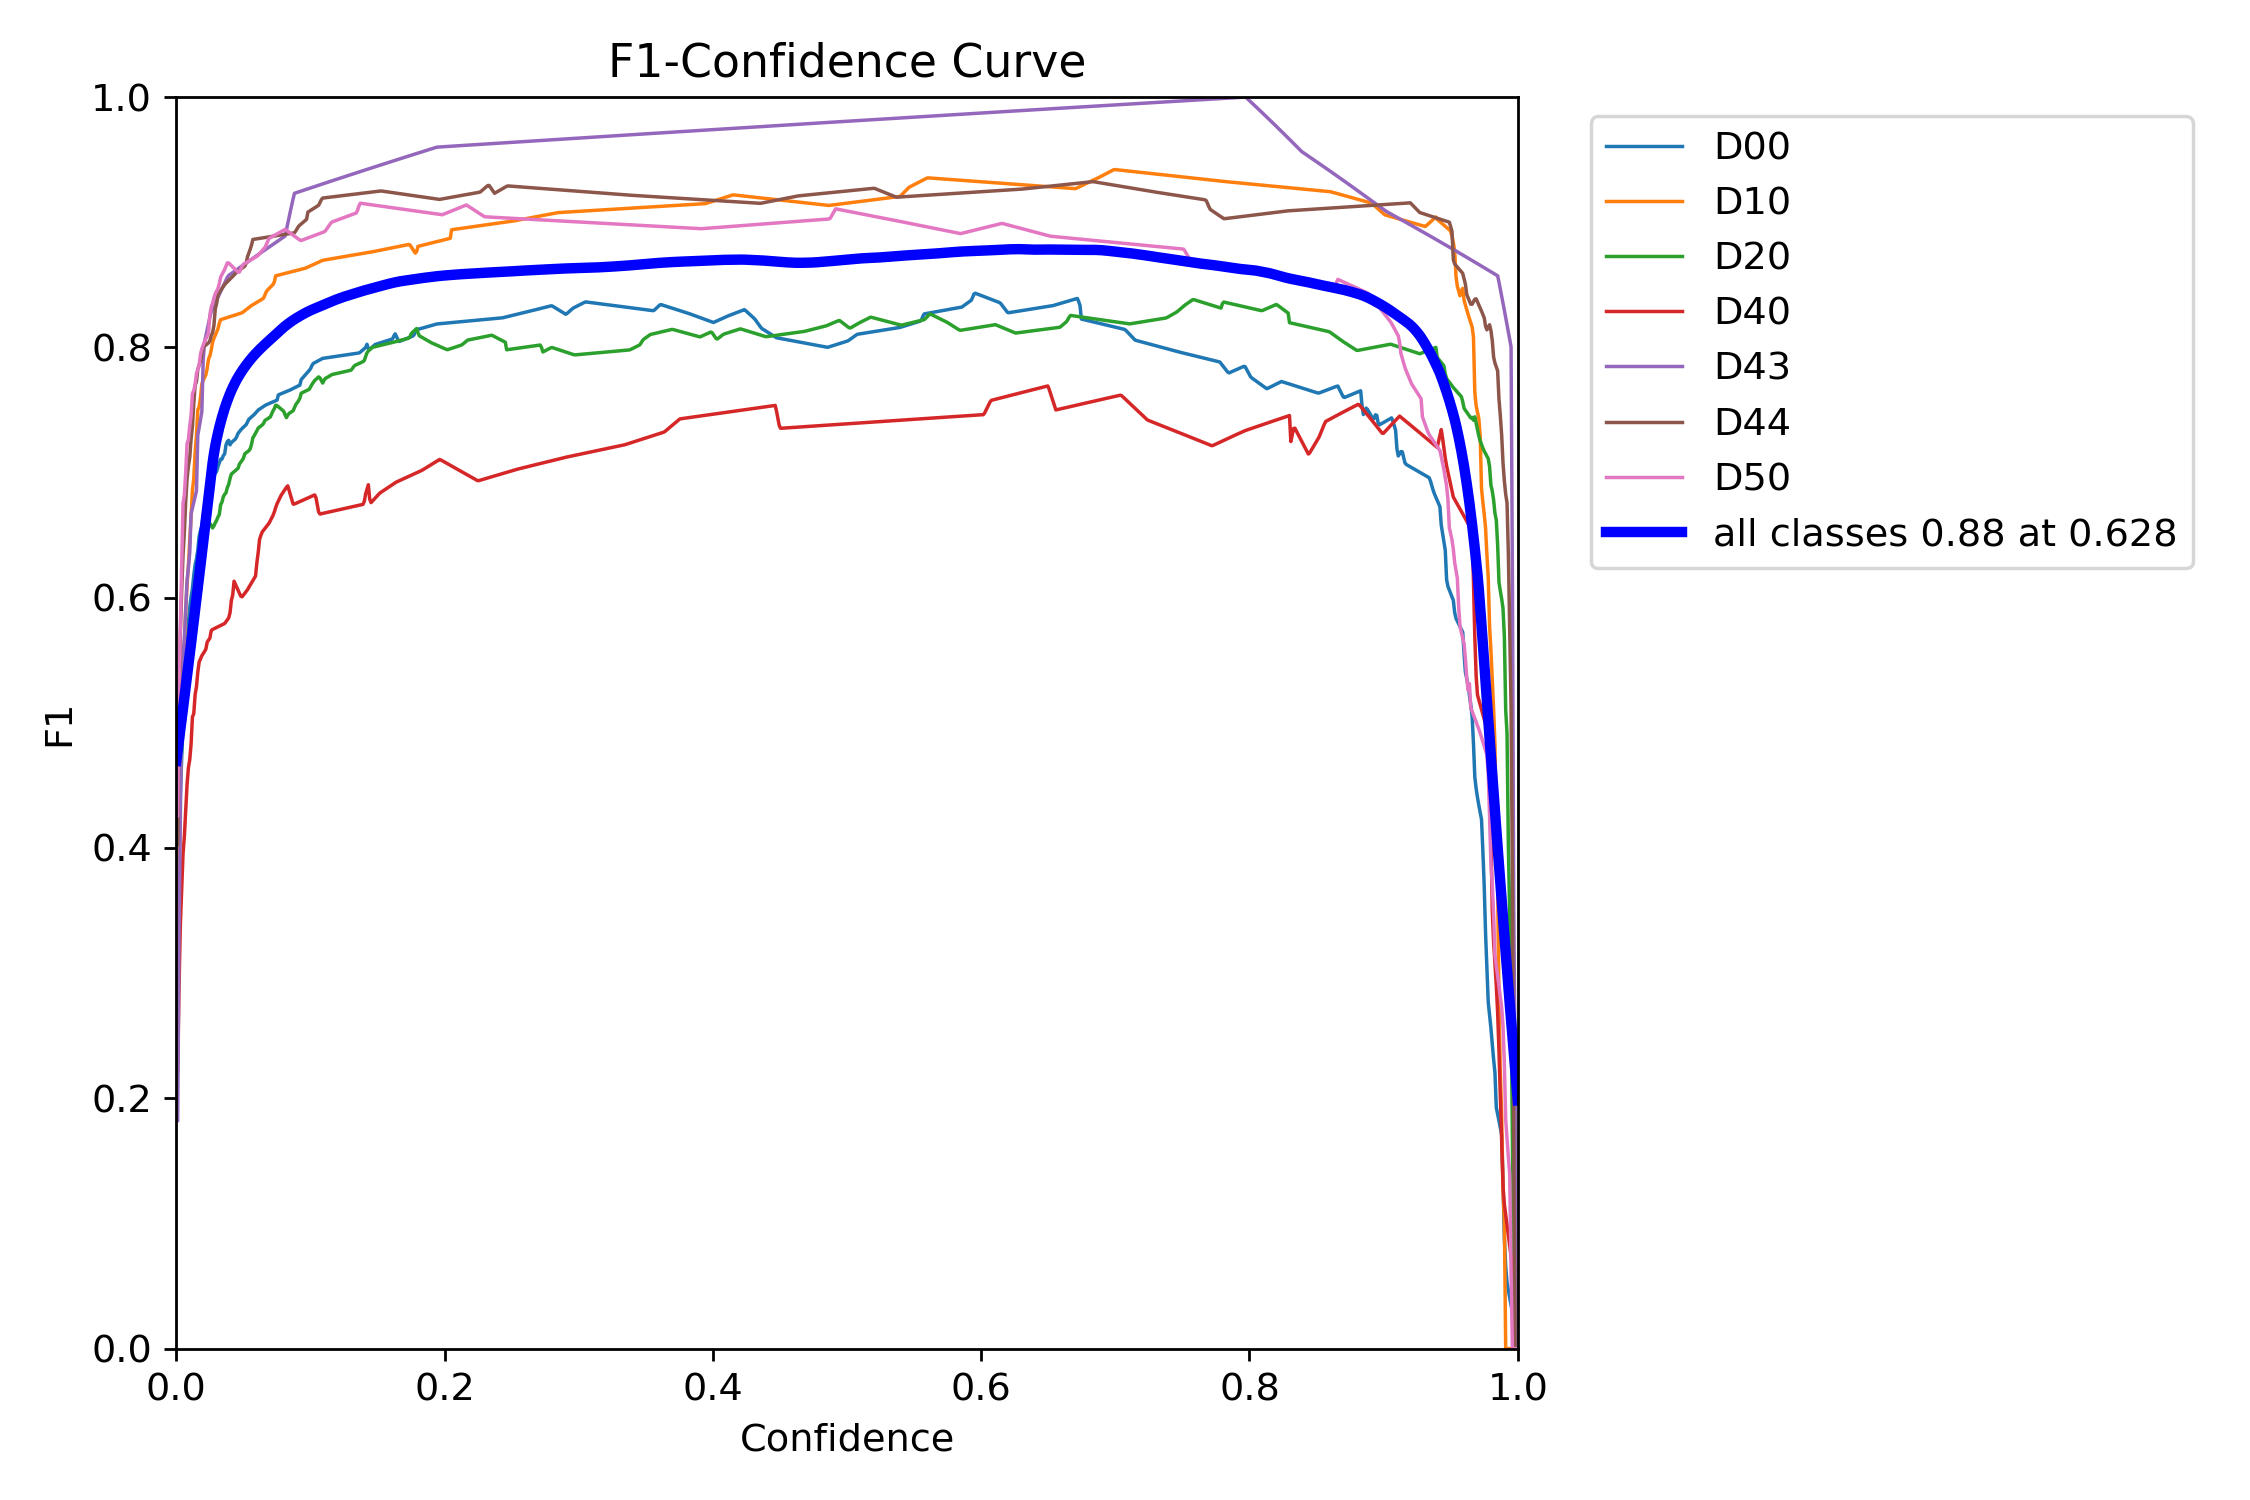

In [20]:
from IPython.display import Image, display
import os

# Path folder hasil testing
base_path = r"C:\Users\fatur\Documents\Source Code Project VK__IF-45-DSIS.03_Kelompok 7_Road Damages Object Detection\YOLOv8\Hasil Model\train\test_results\val"

# Path masing-masing file
confusion_matrix_path = os.path.join(base_path, "confusion_matrix.png")
confusion_matrix_normalized_path = os.path.join(base_path, "confusion_matrix_normalized.png")
f1_curve_path = os.path.join(base_path, "F1_curve.png")

# Menampilkan Confusion Matrix
print("Confusion Matrix (Testing):")
display(Image(filename=confusion_matrix_path, width=600, height=600))

# Menampilkan Confusion Matrix Normalized
print("Confusion Matrix Normalized (Testing):")
display(Image(filename=confusion_matrix_normalized_path, width=600, height=600))

# Menampilkan F1 Confidence Curve
print("F1 Confidence Curve (Testing):")
display(Image(filename=f1_curve_path, width=800, height=400))

Processing: C:\Users\fatur\Documents\Source Code Project VK__IF-45-DSIS.03_Kelompok 7_Road Damages Object Detection\Dataset\test\images\Japan_000872_jpg.rf.b8f2a9d6737eab82c2d03ffaf6c5205e.jpg

image 1/1 C:\Users\fatur\Documents\Source Code Project VK__IF-45-DSIS.03_Kelompok 7_Road Damages Object Detection\Dataset\test\images\Japan_000872_jpg.rf.b8f2a9d6737eab82c2d03ffaf6c5205e.jpg: 640x640 1 D20, 66.3ms
Speed: 4.1ms preprocess, 66.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to C:\Users\fatur\Documents\Source Code Project VK__IF-45-DSIS.03_Kelompok 7_Road Damages Object Detection\YOLOv8\Hasil Model\inference_results\predict_test_random_20
Processing: C:\Users\fatur\Documents\Source Code Project VK__IF-45-DSIS.03_Kelompok 7_Road Damages Object Detection\Dataset\test\images\Japan_001099_jpg.rf.5e19ab6098fec6c85d6b5a45bbeebb3b.jpg

image 1/1 C:\Users\fatur\Documents\Source Code Project VK__IF-45-DSIS.03_Kelompok 7_Road Damages Object Detection\Datase

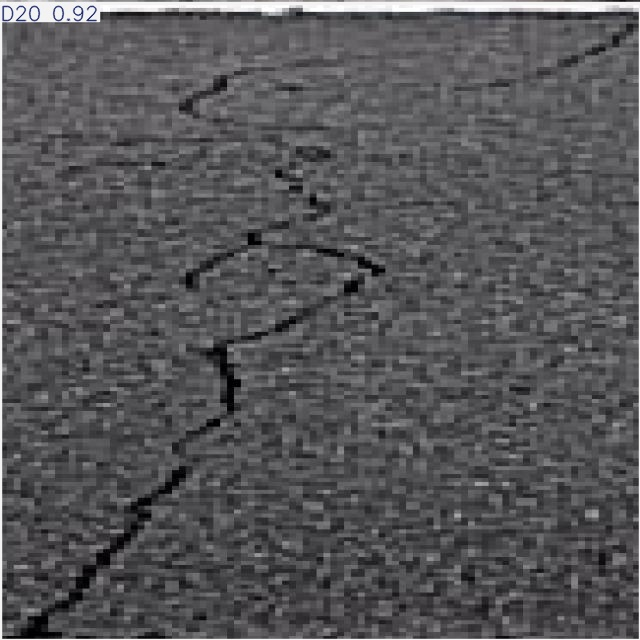

In [25]:
import os
import random
from IPython.display import Image, display
from ultralytics import YOLO

# Path folder dataset (menggunakan data.yaml)
dataset_path = r"C:\Users\fatur\Documents\Source Code Project VK__IF-45-DSIS.03_Kelompok 7_Road Damages Object Detection\Dataset"
test_images_path = os.path.join(dataset_path, "test", "images")  # Folder test images berdasarkan struktur YOLO

# Path file model terbaik
best_model_path = r"C:\Users\fatur\Documents\Source Code Project VK__IF-45-DSIS.03_Kelompok 7_Road Damages Object Detection\YOLOv8\Hasil Model\train\weights\best.pt"

# Path untuk menyimpan hasil inference
inference_save_dir = r"C:\Users\fatur\Documents\Source Code Project VK__IF-45-DSIS.03_Kelompok 7_Road Damages Object Detection\YOLOv8\Hasil Model\inference_results"
os.makedirs(inference_save_dir, exist_ok=True)

# Inisialisasi model dari file terbaik
model = YOLO(best_model_path)

# Ambil semua gambar dalam folder test/images
all_images = [os.path.join(test_images_path, f) for f in os.listdir(test_images_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Pilih 20 gambar secara acak dari dataset test
random_images = random.sample(all_images, min(20, len(all_images)))  # Pilih maksimum 20 gambar

# Confidence threshold untuk filter bounding box yang tidak relevan
confidence_threshold = 0.5  # Bisa disesuaikan (0.5 hingga 0.7)

# Lakukan inference pada 20 gambar acak
for image_path in random_images:
    print(f"Processing: {image_path}")
    model.predict(source=image_path, save=True, conf=confidence_threshold, project=inference_save_dir, name="predict_test_random_20")

# Menampilkan hasil inference
print("\nInference Results (20 random images):")
result_images_dir = os.path.join(inference_save_dir, "predict_test_random_20")
for result_image in os.listdir(result_images_dir):
    # Filter hanya file gambar
    if result_image.endswith(('.jpg', '.jpeg', '.png')):
        result_image_path = os.path.join(result_images_dir, result_image)
        display(Image(filename=result_image_path, width=600))

    Model YOLOv8 diinisialisasi menggunakan file best.pt.

    all_images: Daftar semua file gambar dalam folder test/images.
    random.sample: Memilih hingga 20 gambar secara acak untuk inference.

Kecepatan inferensi berkisar antara 44-66 ms per gambar, dengan waktu preprocess dan postprocess yang sangat kecil.

Setiap gambar yang diuji menunjukkan deteksi bounding box dengan confidence tinggi.

Contoh hasil:
*   **Gambar Japan_000872:** Terdeteksi kelas D20 (confidence 66.3%).
*   **Gambar Japan_001099:** Terdeteksi kelas D20 (confidence 55.8%).



---

Kode yang dijalankan bertujuan untuk melakukan inferensi pada dataset Road Damages Detection menggunakan model YOLOv8 yang telah dilatih. Berikut adalah kesimpulan dari hasil eksperimen:
*   Model berjalan dengan kecepatan inferensi rata-rata 44-66 ms per gambar, yang cukup cepat untuk aplikasi real-time.
*   Proses preprocessing dan postprocessing memakan waktu yang sangat sedikit, sehingga tidak menjadi hambatan signifikan.
*   Model menunjukkan kemampuan mendeteksi berbagai jenis kerusakan jalan (seperti D20, D10, dll.) dengan tingkat kepercayaan tinggi, rata-rata di atas 50%.

